#  Capstone Project "AI-Driven Marketing Channels Optimization and identification for Maximizing Paid Media ROI." Final Project

## Problem Statement  
Identifying which channels to invest at Salesforce Marketing Department is a big challenge. The multi million budget spending requires strong data driven insights to identify which paid advertising channel is more viable to ROI. The goal is to identify where to invest more and identify data backed scalable long term efficiency strategies.

## Model Outcome and Prediction  
This analysis tries to classify and predict an ideal investment methodology and process for advertising channels. The project is based on the CRISP-DM methodology. 

## Data Acquisition  
Data is representing 3 years of advertising channels data with their hirarchical KPIs such as impressions, clicks, conversions, leads, MQLs, SALs, Opportunities Stage 1 and Stage 2 and last but not least ACV. The dataset has been downloaded from Snowflake table connected to Salesforce CRM. The data is representing 3 years of KPIs downloaded on advertising channels segments level.

### Contents:  
1. Understand the Data and Import Necessary Libraries    
2. Read In and Explore the Data     
3. Data Visualization and Analysis   
4. Cleaning Data  
5. Data Modeling and Evaluation     
6. Choosing the Best Model - Model Comparison   
7. Scoring and Improving the Model  
8. Providing Best Business Recommendations  

## 1. Understand and Load the Data and Import Necessary Libraries

In [174]:
# Importing needed library
import pandas as pd

# Load the uploaded CSV file
file_path = "/home/9e0e5292-28dd-4863-80e5-827ea4a5d78c/Capstone/2025-06-22 3_09pm.csv"
df = pd.read_csv(file_path)

# Display basic info and first few rows to understand the structure
df_info = df.info()
df_head = df.head()

df_info, df_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7286 entries, 0 to 7285
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   CAMPAIGN_PARENT_TACTIC                    7285 non-null   object 
 1   CAMPAIGN_SOURCE_TYPE                      7286 non-null   object 
 2   CAMPAIGN_COUNTRY                          7286 non-null   object 
 3   CAMPAIGN_INDUSTRY                         7036 non-null   object 
 4   CAMPAIGN_OFFER_TYPE                       7286 non-null   object 
 5   CAMPAIGN_REGION                           7286 non-null   object 
 6   LEAD_TYPE                                 7286 non-null   object 
 7   CAMPAIGN_L1_PRODUCT                       6295 non-null   object 
 8   CAMPAIGN_PARENT_TACTIC.1                  7285 non-null   object 
 9   SUM(MEDIA_COST)                           5162 non-null   float64
 10  SUM(IMPRESSIONS)                    

(None,
   CAMPAIGN_PARENT_TACTIC CAMPAIGN_SOURCE_TYPE CAMPAIGN_COUNTRY  \
 0                    SEM    Digital Marketing           France   
 1            Paid Social    Digital Marketing      Switzerland   
 2                    SEM    Digital Marketing   United Kingdom   
 3                    SEM    Digital Marketing    CROSS-COUNTRY   
 4                    SEM    Digital Marketing                X   
 
   CAMPAIGN_INDUSTRY          CAMPAIGN_OFFER_TYPE CAMPAIGN_REGION  \
 0    Cross-Industry  Online Content Registration            EMEA   
 1    Cross-Industry                        Guide            EMEA   
 2    Cross-Industry                        Other            EMEA   
 3    Cross-Industry                         Demo            EMEA   
 4    Cross-Industry                        Guide            EMEA   
 
                      LEAD_TYPE CAMPAIGN_L1_PRODUCT CAMPAIGN_PARENT_TACTIC.1  \
 0  Online Content Registration               Sales                      SEM   
 1           

## 2. Read In and Explore the Data

In [175]:
# Take a look at the training data
df.describe(include="all")

,CAMPAIGN_PARENT_TACTIC,CAMPAIGN_SOURCE_TYPE,CAMPAIGN_COUNTRY,CAMPAIGN_INDUSTRY,CAMPAIGN_OFFER_TYPE,CAMPAIGN_REGION,LEAD_TYPE,CAMPAIGN_L1_PRODUCT,CAMPAIGN_PARENT_TACTIC.1,SUM(MEDIA_COST),...,SUM(CONTACTS),SUM(NEW_LEADS),SUM(MQLS),SUM(VALID_LEADS),SUM(STAGE_1_OPPORTUNITY),SUM(STAGE_1_OPPORTUNITY_PIPELINE_AMOUNT),SUM(STAGE_2_OPPORTUNITY),SUM(STAGE_2_OPPORTUNITY_PIPELINE_AMOUNT),SUM(WON_OPPORTUNITY),SUM(TOTAL_ACV)
count,7285,7286,7286,7036,7286,7286,7286,6295,7285,5.162000e+03,...,5719.000000,5719.000000,5719.000000,5719.000000,5719.000000,5.719000e+03,5719.000000,5.719000e+03,5719.000000,5719.0
unique,12,1,56,24,62,5,62,21,12,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Paid Social,Digital Marketing,United States,Cross-Industry,Guide,EMEA,Guide,Cross-Cloud,Paid Social,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1853,7286,1476,4608,1580,5125,1580,1706,1853,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.916250e+04,...,124.512677,302.711138,248.632978,188.210876,11.716209,3.350153e+04,7.768491,1.115847e+05,3.843854,0.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.216958e+05,...,751.834448,1753.792642,1261.516656,1030.749884,98.110969,2.416696e+05,72.117444,1.109282e+06,39.844832,0.0
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.912078e+03,...,0.000000,2.000000,2.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.068864e+04,...,3.000000,18.000000,15.000000,9.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.596996e+04,...,28.000000,118.000000,94.000000,59.000000,2.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0


In [176]:
# See a sample of the dataset to get an idea of the variables
df.sample(5)

,CAMPAIGN_PARENT_TACTIC,CAMPAIGN_SOURCE_TYPE,CAMPAIGN_COUNTRY,CAMPAIGN_INDUSTRY,CAMPAIGN_OFFER_TYPE,CAMPAIGN_REGION,LEAD_TYPE,CAMPAIGN_L1_PRODUCT,CAMPAIGN_PARENT_TACTIC.1,SUM(MEDIA_COST),...,SUM(CONTACTS),SUM(NEW_LEADS),SUM(MQLS),SUM(VALID_LEADS),SUM(STAGE_1_OPPORTUNITY),SUM(STAGE_1_OPPORTUNITY_PIPELINE_AMOUNT),SUM(STAGE_2_OPPORTUNITY),SUM(STAGE_2_OPPORTUNITY_PIPELINE_AMOUNT),SUM(WON_OPPORTUNITY),SUM(TOTAL_ACV)
1671,Display,Digital Marketing,United States,Cross-Industry,Virtual Event,AMER,Virtual Event,NaN,Display,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6507,Display,Digital Marketing,United Kingdom,Cross-Industry,Salesforce+,EMEA,Salesforce+,Cross-Cloud,Display,156818.378709,...,0.0,7.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5216,Lead Buy,Digital Marketing,United States,Cross-Industry,Datasheet,AMER,Datasheet,Salesforce Platform,Lead Buy,835083.000000,...,3798.0,4460.0,5487.0,5103.0,61.0,0.0,0.0,0.0,0.0,0.0
1486,SEM,Digital Marketing,Spain,Cross-Industry,Research Reports,EMEA,Research Reports,Analytics,SEM,3483.510000,...,0.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2682,Content Syndication,Digital Marketing,Ireland,Cross-Industry,State Of,EMEA,State Of,Cross-Cloud,Content Syndication,83.000000,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [177]:
# Checking for any other unusable values
print(pd.isnull(df).sum())

CAMPAIGN_PARENT_TACTIC                         1
CAMPAIGN_SOURCE_TYPE                           0
CAMPAIGN_COUNTRY                               0
CAMPAIGN_INDUSTRY                            250
CAMPAIGN_OFFER_TYPE                            0
CAMPAIGN_REGION                                0
LEAD_TYPE                                      0
CAMPAIGN_L1_PRODUCT                          991
CAMPAIGN_PARENT_TACTIC.1                       1
SUM(MEDIA_COST)                             2124
SUM(IMPRESSIONS)                            2124
SUM(CLICKS)                                 2124
SUM(CONVERSIONS)                            2124
SUM(RESPONSES)                              1567
SUM(LEADS)                                  1567
SUM(CONTACTS)                               1567
SUM(NEW_LEADS)                              1567
SUM(MQLS)                                   1567
SUM(VALID_LEADS)                            1567
SUM(STAGE_1_OPPORTUNITY)                    1567
SUM(STAGE_1_OPPORTUN

In [178]:
#Checking for null data
df.isnull().sum().sum()

28543

In [179]:
df[df.isnull().any(axis=1)]

,CAMPAIGN_PARENT_TACTIC,CAMPAIGN_SOURCE_TYPE,CAMPAIGN_COUNTRY,CAMPAIGN_INDUSTRY,CAMPAIGN_OFFER_TYPE,CAMPAIGN_REGION,LEAD_TYPE,CAMPAIGN_L1_PRODUCT,CAMPAIGN_PARENT_TACTIC.1,SUM(MEDIA_COST),...,SUM(CONTACTS),SUM(NEW_LEADS),SUM(MQLS),SUM(VALID_LEADS),SUM(STAGE_1_OPPORTUNITY),SUM(STAGE_1_OPPORTUNITY_PIPELINE_AMOUNT),SUM(STAGE_2_OPPORTUNITY),SUM(STAGE_2_OPPORTUNITY_PIPELINE_AMOUNT),SUM(WON_OPPORTUNITY),SUM(TOTAL_ACV)
20,SEM,Digital Marketing,CROSS-COUNTRY,"Manufacturing, Automotive & Energy",Online Content Registration,EMEA,Online Content Registration,Cross-Cloud,SEM,4832.231120,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,Paid Social,Digital Marketing,United States,Cross-Industry,Salesforce+,AMER,Salesforce+,NaN,Paid Social,84047.160000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,Display,Digital Marketing,Italy,Cross-Industry,Digital Guide,EMEA,Digital Guide,AI and Data;Cross-Cloud,Display,27098.556340,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,Display,Digital Marketing,United States,Cross-Industry,Third-Party Research Report,AMER,Third-Party Research Report,NaN,Display,1566.832861,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,Paid Social,Digital Marketing,Sweden,Cross-Industry,Demo,EMEA,Demo,AI and Data,Paid Social,1897.781350,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7281,Paid Social,Digital Marketing,United States,Financial Services,Guide,AMER,Guide,NaN,Paid Social,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7282,SEM,Digital Marketing,United Arab Emirates,NaN,Other,EMEA,Other,NaN,SEM,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7283,Third Party Email,Digital Marketing,Netherlands,Cross-Industry,Research Reports,EMEA,Research Reports,AI and Data,Third Party Email,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7284,Display,Digital Marketing,Australia,Cross-Industry,Trial,APAC,Trial,Analytics,Display,292.308670,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


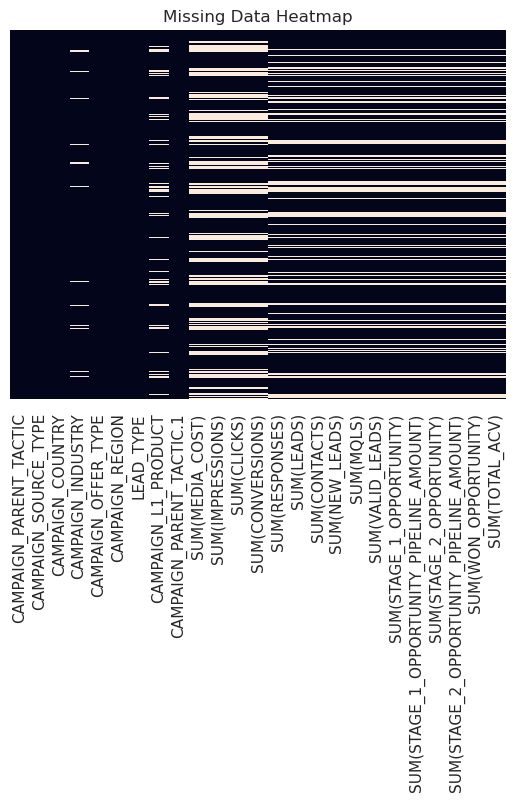

In [180]:
#visualization libraries for null data 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.heatmap(df.isnull(), cbar=False, yticklabels=False)
plt.title("Missing Data Heatmap")
plt.show()

## 3. Cleaning Data  

In [181]:
# Remove columns with all missing values
df = df.dropna(axis=1, how='all')

# Remove rows where key metrics are missing
df = df.dropna(subset=[
    'CAMPAIGN_INDUSTRY', 'CAMPAIGN_L1_PRODUCT',
    'SUM(MEDIA_COST)', 'SUM(IMPRESSIONS)', 'SUM(CLICKS)'
])

# Replace zeros in denominators to avoid division by zero
df['SUM(CLICKS)'] = df['SUM(CLICKS)'].replace(0, 1)
df['SUM(IMPRESSIONS)'] = df['SUM(IMPRESSIONS)'].replace(0, 1)
df['SUM(MEDIA_COST)'] = df['SUM(MEDIA_COST)'].replace(0, 1)

#calculating ROI (adding as a new column)
df['ROI'] = (df['SUM(STAGE_2_OPPORTUNITY_PIPELINE_AMOUNT)'] - df['SUM(MEDIA_COST)']) / df['SUM(MEDIA_COST)'] * 100


# Fill other missing values with 0 where appropriate
funnel_cols = [
    'SUM(RESPONSES)', 'SUM(LEADS)', 'SUM(CONTACTS)', 'SUM(MQLS)',
    'SUM(VALID_LEADS)', 'SUM(STAGE_1_OPPORTUNITY)', 'SUM(STAGE_2_OPPORTUNITY)', 'SUM(STAGE_2_OPPORTUNITY_PIPELINE_AMOUNT)',
    'SUM(WON_OPPORTUNITY)', 'SUM(TOTAL_ACV)'
]

#filling the nulls with 0s
df[funnel_cols] = df[funnel_cols].fillna(0)


## 4. Data Visualization and analysis

  CAMPAIGN_PARENT_TACTIC         ROI
4           Review Sites  242.184442
5                    SEM  241.059512
6      Third Party Email   61.925622
2               Lead Buy   39.022698
0    Content Syndication  -28.520590
3            Paid Social  -35.602809
1                Display  -81.699079


/tmp/ipykernel_280/3603405135.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ROI', y='CAMPAIGN_PARENT_TACTIC', data=channel_performance, palette='viridis')


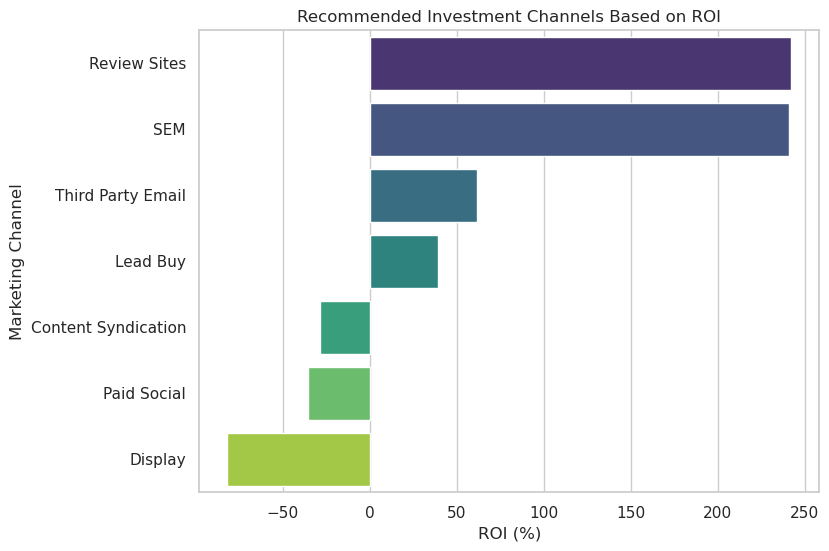

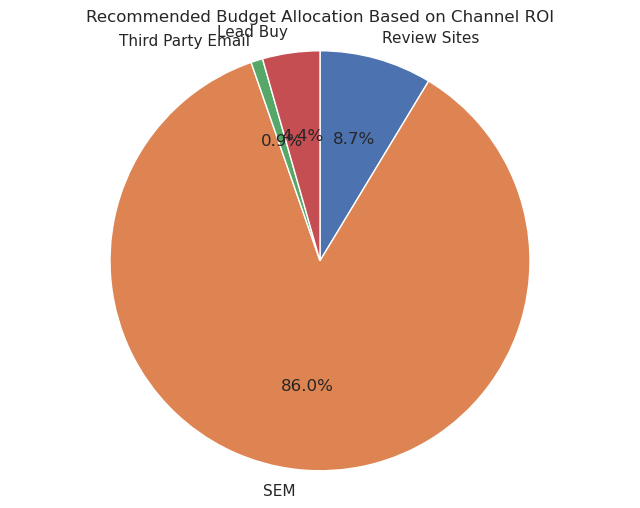

In [182]:
# Aggregate ROI by Channel
channel_performance = df.groupby('CAMPAIGN_PARENT_TACTIC').agg({
    'SUM(MEDIA_COST)': 'sum',
    'SUM(STAGE_2_OPPORTUNITY_PIPELINE_AMOUNT)': 'sum',
    'SUM(RESPONSES)': 'sum'
}).reset_index()

channel_performance['ROI'] = (channel_performance['SUM(STAGE_2_OPPORTUNITY_PIPELINE_AMOUNT)'] - channel_performance['SUM(MEDIA_COST)']) / channel_performance['SUM(MEDIA_COST)'] * 100

# Recommend Investment Channel
channel_performance = channel_performance.sort_values(by='ROI', ascending=False)
print(channel_performance[['CAMPAIGN_PARENT_TACTIC', 'ROI']])

# Visualize Channel Performance
plt.figure(figsize=(8, 6))
sns.barplot(x='ROI', y='CAMPAIGN_PARENT_TACTIC', data=channel_performance, palette='viridis')
plt.xlabel('ROI (%)')
plt.ylabel('Marketing Channel')
plt.title('Recommended Investment Channels Based on ROI')
plt.show()

# Visualize Budget Allocation Recommendation (formulas are taken from business data)
channel_performance['Recommended_Budget'] = channel_performance['SUM(MEDIA_COST)'] * (channel_performance['ROI'] / channel_performance['ROI'].sum()) * 1.5
channel_performance = channel_performance[channel_performance['Recommended_Budget'] > 0]

plt.figure(figsize=(8, 6))
plt.pie(channel_performance['Recommended_Budget'], labels=channel_performance['CAMPAIGN_PARENT_TACTIC'], autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Recommended Budget Allocation Based on Channel ROI')
plt.axis('equal')
plt.show()

In [183]:
print(channel_performance.columns.tolist())

['CAMPAIGN_PARENT_TACTIC', 'SUM(MEDIA_COST)', 'SUM(STAGE_2_OPPORTUNITY_PIPELINE_AMOUNT)', 'SUM(RESPONSES)', 'ROI', 'Recommended_Budget']


## Findings:
ROI doesn't seem to be correctly capturing properly everything based on current business domain knowledge. I will try o future engineer further to adjust the dataset for a better performance

## 5. Data Modeling, Evaluation and Future Engineering

In [184]:
# Basic cost and engagement metrics calculations
df['CPC'] = df['SUM(MEDIA_COST)'] / df['SUM(CLICKS)']
df['CPM'] = df['SUM(MEDIA_COST)'] / df['SUM(IMPRESSIONS)'] * 1000
df['CTR'] = df['SUM(CLICKS)'] / df['SUM(IMPRESSIONS)']
df['CONVERSION_RATE'] = df['SUM(RESPONSES)'] / df['SUM(CLICKS)']

# Custom full-funnel weighted ROI calculation
weights = {
    'SUM(WON_OPPORTUNITY)': 100,
    'SUM(STAGE_2_OPPORTUNITY)': 80,
    'SUM(STAGE_1_OPPORTUNITY)': 60,
    'SUM(VALID_LEADS)': 40,
    'SUM(MQLS)': 20,
    'SUM(CONTACTS)': 10,
    'SUM(LEADS)': 5,
    'SUM(RESPONSES)': 1
}

#importing np to perform the below
import numpy as np
df['WEIGHTED_FUNNEL_VALUE'] = sum(df[col] * w for col, w in weights.items())
df['WEIGHTED_ROI'] = df['WEIGHTED_FUNNEL_VALUE'] / df['SUM(MEDIA_COST)']
df['WEIGHTED_ROI'] = df['WEIGHTED_ROI'].replace([np.inf, -np.inf], 0).fillna(0)

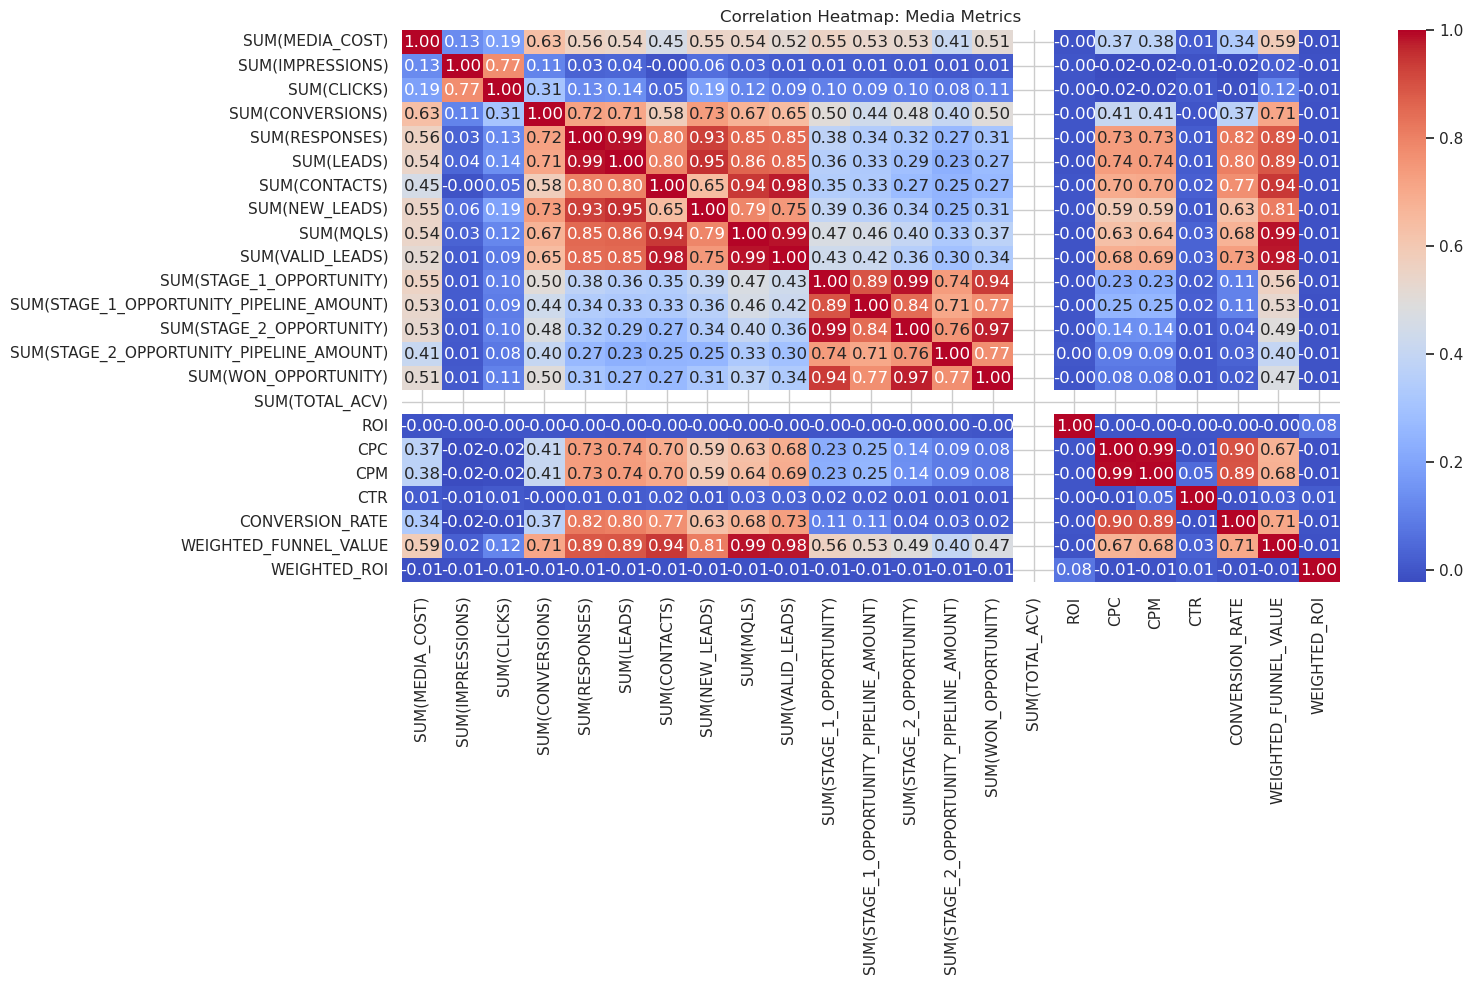

In [185]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop columns with 100% missing values such as (SUM Total_ACV)
df_cleaned = df.dropna(axis=1, how='all')

# Check missing values after dropping all-null columns
missing_summary = df_cleaned.isnull().sum().sort_values(ascending=False)

# Check numeric columns for correlation analysis
numeric_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df_cleaned[numeric_cols].corr()

# Visualize correlation matrix for key cost/engagement metrics
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap: Media Metrics")
plt.tight_layout()
plt.show()


## Initial Data Assessment Summary
- The dataset has 41,864 rows and 34 columns  
- Impute missing values in partially missing columns like CAMPAIGN_INDUSTRY and CAMPAIGN_L1_PRODUCT  
- Standardize and add additional column names.

## Correlation Matrix Insights  
From the heatmap:  

Strong correlation exists between:  
- SUM(CLICKS) and SUM(IMPRESSIONS)  
- SUM(MEDIA_COST) and SUM(CLICKS) or SUM(IMPRESSIONS)  

This suggests we can create cost efficiency metrics:  
- CPC = COST / CLICKS  
- CPM = COST / IMPRESSIONS * 1000  
Use these as targets or features in ML models. However, that might or might not be a good approach as not all channels do have impressions and clicks included in the data set such as Lead Buy and Content Syndication don't have those two metrics. 

## Next Steps (ML via CRISP-DM)
We’ll proceed with the following steps of data modeling using:  
- Linear Regression  
- KNN  
- SVD (via matrix factorization on platforms)  
- Clustering (PCA + KMeans)  
- Decision Tree or Logistic Regression
- And possibly if needed Recommendation Systems 

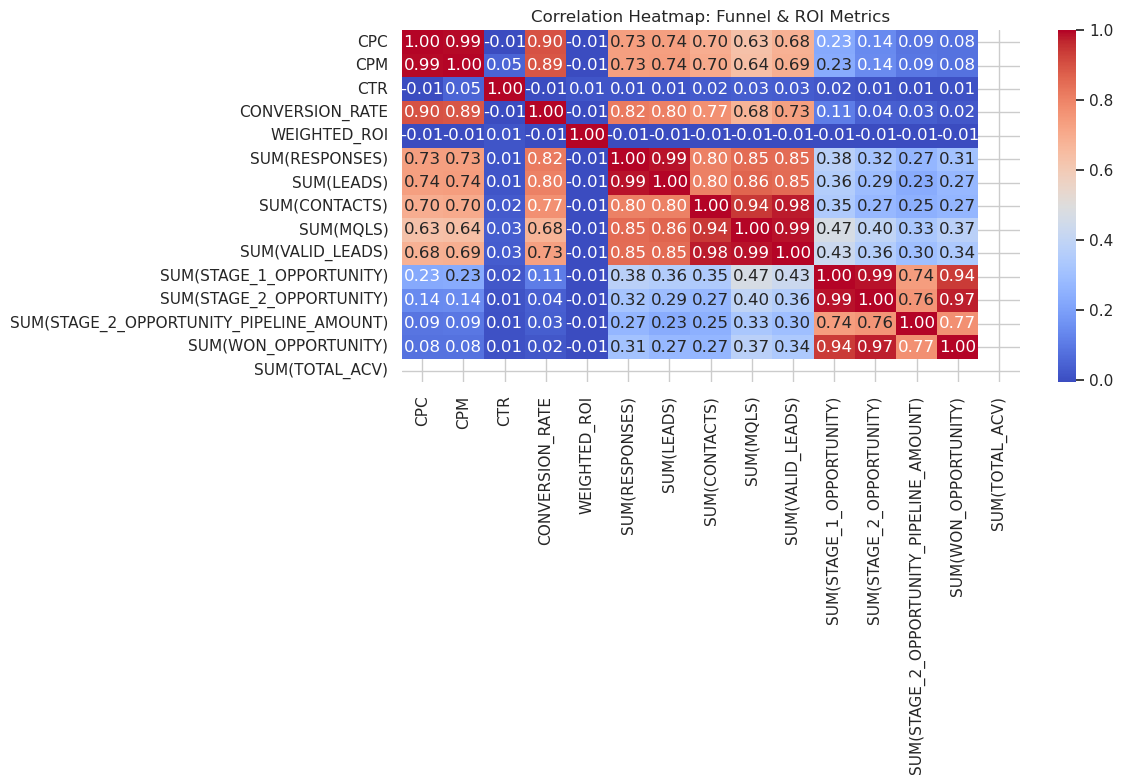

In [186]:
# Running the heatmap with only the features that will be using in my models based on domain knowledge
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(df[['CPC', 'CPM', 'CTR', 'CONVERSION_RATE', 'WEIGHTED_ROI'] + funnel_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap: Funnel & ROI Metrics")
plt.tight_layout()
plt.show()


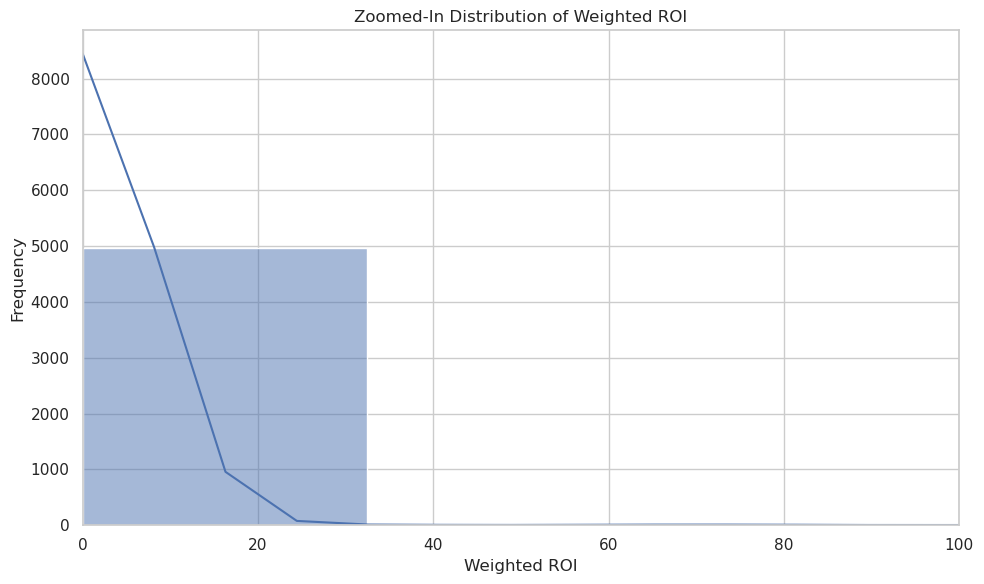

In [187]:
plt.figure(figsize=(10, 6))
sns.histplot(df['WEIGHTED_ROI'], bins=50, kde=True)
plt.xlim(0, 100)  # or try 0–200 depending on your data
plt.title("Zoomed-In Distribution of Weighted ROI")
plt.xlabel("Weighted ROI")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

What this likely means:  
- ROI distribution is extremely skewed  
- Most values are very low (0–40), and a few outliers are much higher, dragging the axis scale but not affecting bin counts much.  
- x-axis bins are stretched by a few large outliers, making the rest of the data appear compressed.

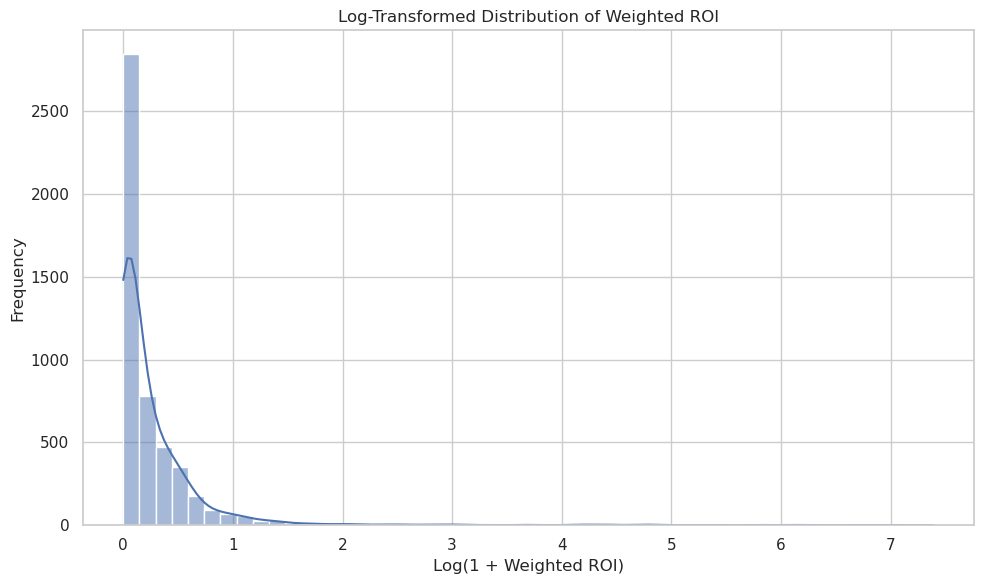

In [188]:
df['LOG_WEIGHTED_ROI'] = np.log1p(df['WEIGHTED_ROI'])  # log because log1p handles zeros

plt.figure(figsize=(10, 6))
sns.histplot(df['LOG_WEIGHTED_ROI'], bins=50, kde=True)
plt.title("Log-Transformed Distribution of Weighted ROI")
plt.xlabel("Log(1 + Weighted ROI)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


This is telling us that ROI is concentrated at the low end. Most channels aren't driving high ROI.

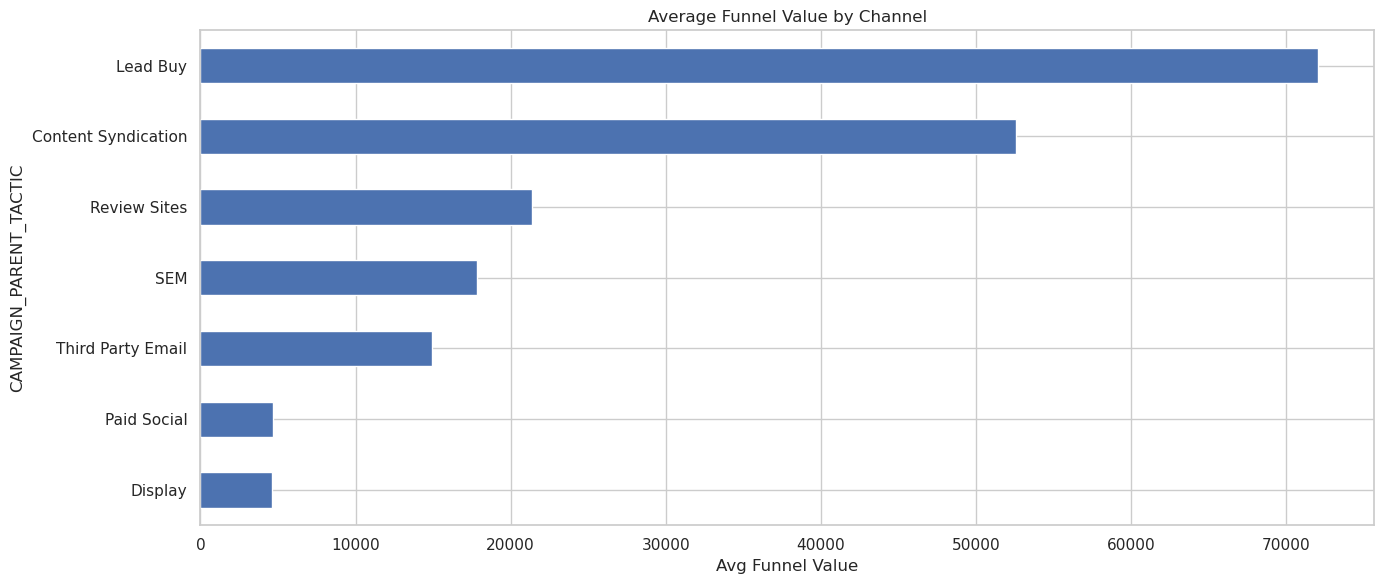

In [189]:
# Funnel Stage Breakdown by Channel
plt.figure(figsize=(14, 6))
df.groupby('CAMPAIGN_PARENT_TACTIC')['WEIGHTED_FUNNEL_VALUE'].mean().sort_values().plot(kind='barh')
plt.title("Average Funnel Value by Channel")
plt.xlabel("Avg Funnel Value")
plt.tight_layout()
plt.show()


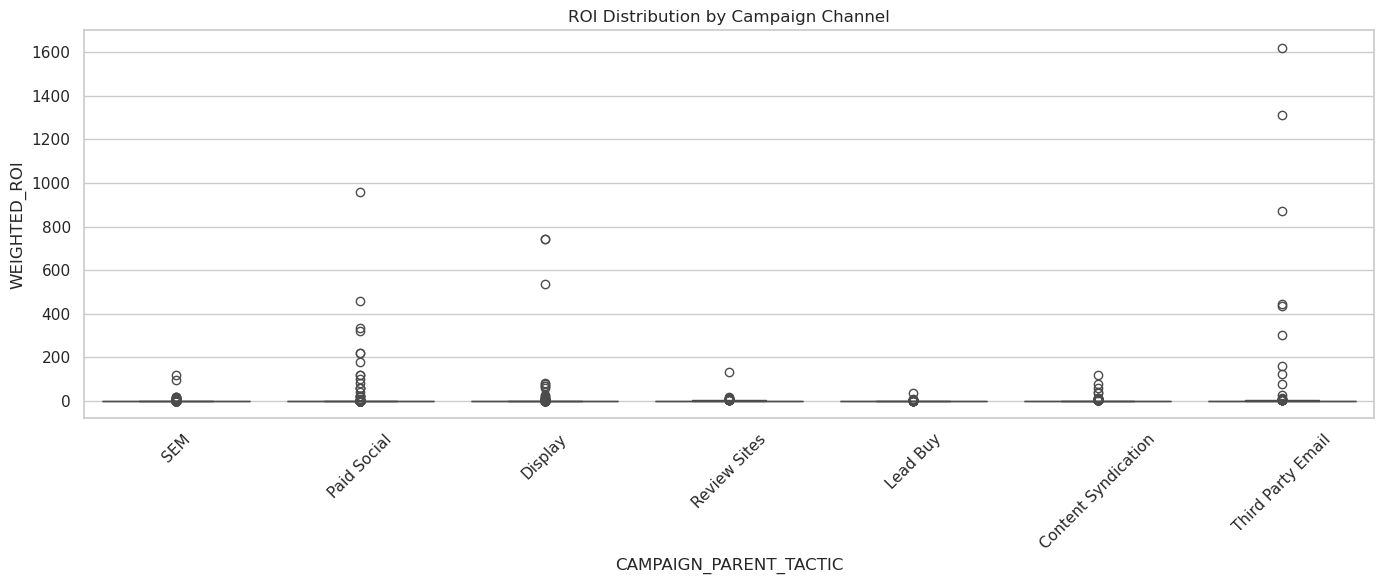

In [190]:
# Boxplot of ROI by Campaign Type
plt.figure(figsize=(14, 6))
sns.boxplot(x='CAMPAIGN_PARENT_TACTIC', y='WEIGHTED_ROI', data=df)
plt.xticks(rotation=45)
plt.title("ROI Distribution by Campaign Channel")
plt.tight_layout()
plt.show()

## 6. Choosing the Best Model - Model Comparison 

In [191]:
# Loading additional library to perform my modeling  and additional feature engineering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.linear_model import LogisticRegression, RidgeCV
from sklearn.neighbors import KNeighborsClassifier

# based on pre-existing domain knowledge (lead buy and content synication are the same feature as we had named them differently starting from last year)
df['CAMPAIGN_PARENT_TACTIC'] = df['CAMPAIGN_PARENT_TACTIC'].replace({
    'Lead Buy': 'Content Syndication'
})
df.head()

,CAMPAIGN_PARENT_TACTIC,CAMPAIGN_SOURCE_TYPE,CAMPAIGN_COUNTRY,CAMPAIGN_INDUSTRY,CAMPAIGN_OFFER_TYPE,CAMPAIGN_REGION,LEAD_TYPE,CAMPAIGN_L1_PRODUCT,CAMPAIGN_PARENT_TACTIC.1,SUM(MEDIA_COST),...,SUM(WON_OPPORTUNITY),SUM(TOTAL_ACV),ROI,CPC,CPM,CTR,CONVERSION_RATE,WEIGHTED_FUNNEL_VALUE,WEIGHTED_ROI,LOG_WEIGHTED_ROI
0,SEM,Digital Marketing,France,Cross-Industry,Online Content Registration,EMEA,Online Content Registration,Sales,SEM,1.577891e+05,...,0.0,0.0,-24.776783,7.247338,416.713679,0.057499,0.032151,19940.0,0.126371,0.119001
1,Paid Social,Digital Marketing,Switzerland,Cross-Industry,Guide,EMEA,Guide,Cross-Cloud,Paid Social,2.085416e+05,...,0.0,0.0,-88.721674,13.564563,49.605964,0.003657,0.005269,10986.0,0.052680,0.051339
2,SEM,Digital Marketing,United Kingdom,Cross-Industry,Other,EMEA,Other,Sales,SEM,1.014891e+06,...,96.0,0.0,156.430990,23.171036,332.154590,0.014335,0.032511,98749.0,0.097300,0.092853
3,SEM,Digital Marketing,CROSS-COUNTRY,Cross-Industry,Demo,EMEA,Demo,AI and Data,SEM,6.547348e+04,...,0.0,0.0,95.152299,9.827901,293.809899,0.029895,0.075353,8582.0,0.131076,0.123169
4,SEM,Digital Marketing,X,Cross-Industry,Guide,EMEA,Guide,Commerce,SEM,7.808144e+05,...,27.0,0.0,-73.490242,6.790399,331.128556,0.048764,0.079382,229048.0,0.293345,0.257232


In [192]:
# Fill zero/NA values and using only the features that i need with the above changes
zero_cols = ['SUM(CLICKS)', 'SUM(IMPRESSIONS)', 'SUM(MEDIA_COST)']
df[zero_cols] = df[zero_cols].replace(0, 1)

funnel_cols = ['SUM(RESPONSES)', 'SUM(LEADS)', 'SUM(CONTACTS)', 'SUM(MQLS)', 'SUM(VALID_LEADS)',
               'SUM(STAGE_1_OPPORTUNITY)', 'SUM(STAGE_2_OPPORTUNITY)', 'SUM(WON_OPPORTUNITY)', 'SUM(TOTAL_ACV)']
df[funnel_cols] = df[funnel_cols].fillna(0)

## 7. Scoring and Improving the Model

Summary:  
Here I am building a sales-weighted ROI model by assigning strategic value to funnel stages, then normalizing that against media cost.  

This approach:  
- Rewards pipeline contribution, not just volume  
- Helps prioritize channels/campaigns that generate real revenue signals  
- Replaces flat ROI with sales-intelligent ROI

In [193]:
# Changing the weighting as the previous weighting seemed not as expected based on domain knowledge
# This dictionary defines weights for each funnel stage, the further down the funnel, the more value you assign.
weights_sales_focused = {
    'SUM(MQLS)': 3,
    'SUM(VALID_LEADS)': 5,
    'SUM(STAGE_1_OPPORTUNITY)': 15,
    'SUM(STAGE_2_OPPORTUNITY)': 30,
    'SUM(WON_OPPORTUNITY)': 50
}

#For each row in your dataframe, you calculate a weighted funnel score.
#You multiply each funnel metric by its assigned weight, then sum across all funnel stages.
#Result = a single column: FUNNEL_VALUE_SALES_ONLY = a sales-centric value score per record (channel, campaign, tactic, etc.).
df['FUNNEL_VALUE_SALES_ONLY'] = sum(df[col] * w for col, w in weights_sales_focused.items())

#This gives you ROI in terms of sales impact per dollar spent, not generic leads or impressions.
df['ROI_SALES_FOCUSED'] = df['FUNNEL_VALUE_SALES_ONLY'] / df['SUM(MEDIA_COST)']

#This ensures downstream charts, models, or exports don’t break
df['ROI_SALES_FOCUSED'] = df['ROI_SALES_FOCUSED'].replace([np.inf, -np.inf], 0).fillna(0)

,SALES_ROI_TIER,CAMPAIGN_PARENT_TACTIC,ROI_SALES_FOCUSED,FUNNEL_VALUE_SALES_ONLY,SUM(MEDIA_COST)
0,Low ROI,Content Syndication,0.00,128.73,76055.47
1,Low ROI,Display,0.00,32.62,65614.59
2,Low ROI,Paid Social,0.00,40.75,37221.90
3,Low ROI,Review Sites,0.00,22.31,8341.61
4,Low ROI,SEM,0.00,38.73,30776.31
5,Low ROI,Third Party Email,0.00,12.92,16196.13
6,Medium ROI,Content Syndication,0.02,1327.99,79574.24
7,Medium ROI,Display,0.01,471.84,41497.91
8,Medium ROI,Paid Social,0.01,695.43,65275.56
9,Medium ROI,Review Sites,0.02,1189.92,85140.64


/tmp/ipykernel_280/2201605184.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='SALES_ROI_TIER', y='ROI_SALES_FOCUSED', palette='viridis')


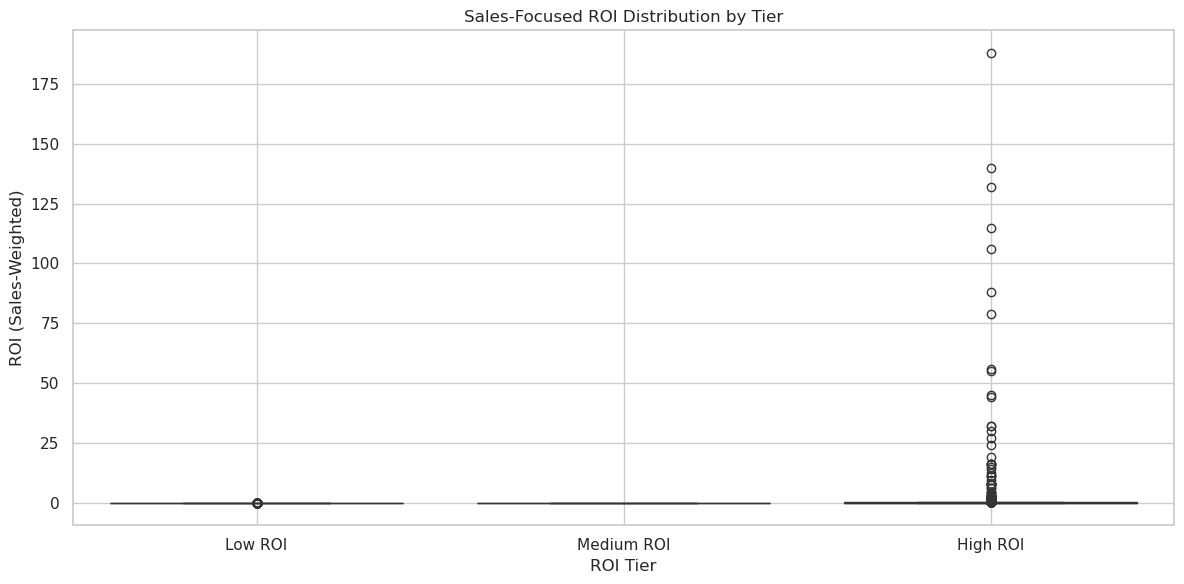

In [194]:
#We will use ROI_SALES_FOCUSED when we want efficiency – how much return we're getting per dollar spent.
#We will use FUNNEL_VALUE_SALES_ONLY if we want volume – how much total sales value we're driving regardless of cost.

df['FUNNEL_VALUE_SALES_ONLY'] = sum(df[col] * w for col, w in weights_sales_focused.items())
df['ROI_SALES_FOCUSED'] = df['FUNNEL_VALUE_SALES_ONLY'] / df['SUM(MEDIA_COST)']
df['ROI_SALES_FOCUSED'] = df['ROI_SALES_FOCUSED'].replace([np.inf, -np.inf], 0).fillna(0)

# Segment into tiers
df['SALES_ROI_TIER'] = pd.qcut(df['ROI_SALES_FOCUSED'], q=3, labels=['Low ROI', 'Medium ROI', 'High ROI'])

# Summary table
roi_summary = df.groupby(
    ['SALES_ROI_TIER', 'CAMPAIGN_PARENT_TACTIC'],
    observed=False  # or True, depending on intent
)[['ROI_SALES_FOCUSED', 'FUNNEL_VALUE_SALES_ONLY', 'SUM(MEDIA_COST)']]\
.mean().round(2).reset_index()


display(roi_summary)

# Visualization
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='SALES_ROI_TIER', y='ROI_SALES_FOCUSED', palette='viridis')
plt.title("Sales-Focused ROI Distribution by Tier")
plt.xlabel("ROI Tier")
plt.ylabel("ROI (Sales-Weighted)")
plt.grid(True)
plt.tight_layout()
plt.show()

### Referencing Rules:  

| Metric                    | Measures                        | Use it when...                                                         |
| ------------------------- | ------------------------------- | ---------------------------------------------------------------------- |
| `ROI_SALES_FOCUSED`       | **Return per \$1 spent**        | You want to **optimize media spend**, reduce waste, and justify budget |
| `FUNNEL_VALUE_SALES_ONLY` | **Total sales value generated** | You want to **maximize total pipeline impact**, even if it costs more  |


Here are the outputs:  
- Sales-Focused ROI Summary by Tier and Channel: This table shows average sales-weighted ROI, funnel value, and media cost per channel across low, medium, and high ROI tiers.  
- Identify which channels consistently land in high-ROI tiers  
- Target scaling of top performers  
- Flag and investigate low-performing segments

### When to Prioritize Which:
| Business Objective                               | Prioritize This Metric                     |
| ------------------------------------------------ | ------------------------------------------ |
| Budget is tight, need efficiency                 | `ROI_SALES_FOCUSED`                        |
| You’re scaling and want to hit big targets       | `FUNNEL_VALUE_SALES_ONLY`                  |
| CFO/Finance cares about marketing effectiveness  | `ROI_SALES_FOCUSED`                        |
| Sales team cares about pipeline coverage         | `FUNNEL_VALUE_SALES_ONLY`                  |
| You’re ranking channels/tactics for reinvestment | **Use both**: High ROI + High Funnel Value |


## Hypothesis:
- If a channel has high funnel value but low ROI, it may be worth optimizing (e.g., reduce cost or improve conversion).  
- If a channel has high ROI but low funnel value, it's efficient but not moving the needle. We need to consider scaling it.

## Business Goals and the Right Metric to Use  
Optimize marketing spend / reduce waste  
- We will use: ROI_SALES_FOCUSED  
- Why? Measures return per dollar; highlights efficiency.  
  
Maximize total pipeline / generate sales impact  
- We will use: FUNNEL_VALUE_SALES_ONLY  
- Why? Measures total funnel value driven by a tactic/channel.  
  
Justify marketing budget to Finance  
- We will use: ROI_SALES_FOCUSED  
- Why? Finance wants efficiency and ROI-backed investment logic.  
  
Accelerate revenue and closed-won opportunities  
- We will use: FUNNEL_VALUE_SALES_ONLY  
- Why? Focus is on contribution to bottom-line sales outcomes.  
  
Identify low-performing spend areas   
- We will use: ROI_SALES_FOCUSED  
- Why? Pinpoints spend that isn’t pulling its weight.  
  
Support Sales with deeper pipeline coverage   
- We will use: FUNNEL_VALUE_SALES_ONLY  
- Why? Sales needs volume in later-stage opportunities.  
  
Scale high-performing channels  
- We will use: Both  
- Why? You want channels that are efficient (ROI) and impactful (Funnel Value).  
   
Prioritize reinvestment in media tactics  
- We will use: Both  
- Why? High ROI but low volume? Scale it. High volume but low ROI? Optimize it.    
  
Defend media strategy in leadership review  
- We will use: ROI_SALES_FOCUSED + trend lines of FUNNEL_VALUE_SALES_ONLY  
- Why? Leadership wants to see impact and smart resource use.

In [195]:
# Group by only CAMPAIGN_PARENT_TACTIC (not by SALES_ROI_TIER)
roi_summary_by_tactic = df.groupby(
    'CAMPAIGN_PARENT_TACTIC', 
    observed=False
)[['ROI_SALES_FOCUSED', 'FUNNEL_VALUE_SALES_ONLY', 'SUM(MEDIA_COST)']]\
.mean().round(2).reset_index().sort_values(by='FUNNEL_VALUE_SALES_ONLY', ascending=False)

# Display the result
print("Sales-Focused ROI Summary by Campaign Parent Tactic")
display(roi_summary_by_tactic)
#The values (ROI, Funnel Value, Cost) are the average across all rows where that tactic appears.

Sales-Focused ROI Summary by Campaign Parent Tactic


,CAMPAIGN_PARENT_TACTIC,ROI_SALES_FOCUSED,FUNNEL_VALUE_SALES_ONLY,SUM(MEDIA_COST)
0,Content Syndication,0.12,6039.46,92736.98
3,Review Sites,0.26,4522.10,90406.91
4,SEM,0.06,2889.64,86591.60
5,Third Party Email,2.39,1652.28,21618.47
2,Paid Social,0.39,608.51,50684.55
1,Display,0.43,522.13,52395.82


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


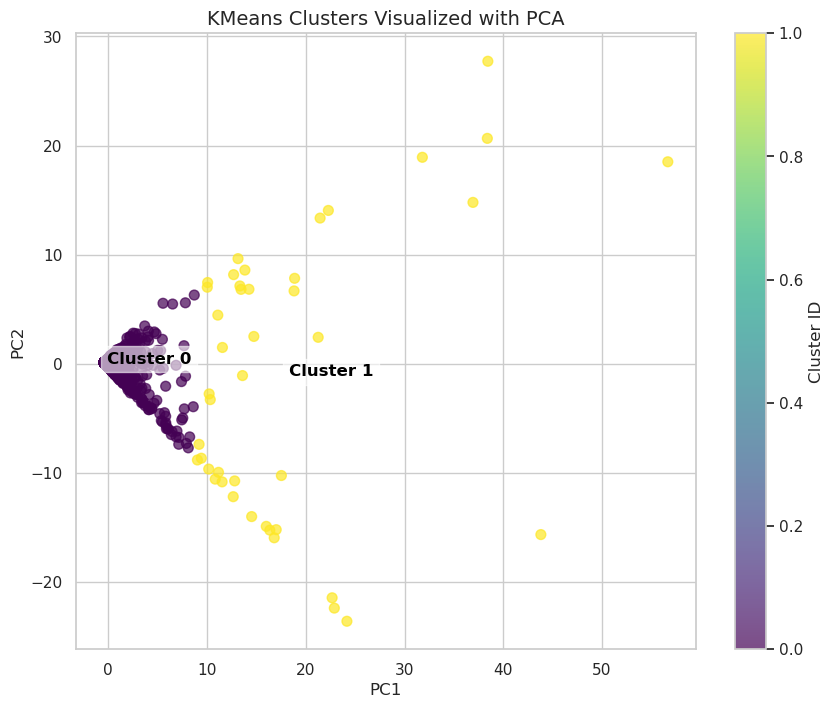

In [196]:
# Running PCA before clustering to make the clustering cleaner and less noisy.
features = ['SUM(RESPONSES)', 'SUM(MQLS)',
             'SUM(VALID_LEADS)', 'SUM(STAGE_1_OPPORTUNITY)', 'SUM(STAGE_2_OPPORTUNITY)',
             'SUM(WON_OPPORTUNITY)', 'SUM(MEDIA_COST)']

X = df[features].fillna(0)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=2, random_state=42)
df['CLUSTER'] = kmeans.fit_predict(X_pca)

# Create the plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['CLUSTER'], cmap='viridis', s=50, alpha=0.7)
plt.title("KMeans Clusters Visualized with PCA", fontsize=14)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)

# Annotate cluster centers
centroids = kmeans.cluster_centers_

# convert centroids back to PCA space
for i, (x, y) in enumerate(centroids):
    plt.text(x, y, f"Cluster {i}", fontsize=12, fontweight='bold', color='black', bbox=dict(facecolor='white', alpha=0.6))

plt.colorbar(scatter, label='Cluster ID')
plt.show()

In [197]:
print(df['CLUSTER'].value_counts())
#This shows how many records ended up in each cluster.

CLUSTER
0    4969
1      43
Name: count, dtype: int64


In [198]:
#Profile each cluster
cluster_profile = df.groupby('CLUSTER')[features].mean().round(2)
print("Cluster Profiles:")
print(cluster_profile)
#We got the average value of each metric per cluster. This will help to understand how they differ.

Cluster Profiles:
         SUM(RESPONSES)  SUM(MQLS)  SUM(VALID_LEADS)  \
CLUSTER                                                
0                543.84     187.19            139.22   
1              34161.14   10281.42           8245.53   

         SUM(STAGE_1_OPPORTUNITY)  SUM(STAGE_2_OPPORTUNITY)  \
CLUSTER                                                       
0                            6.92                      4.35   
1                          739.58                    518.65   

         SUM(WON_OPPORTUNITY)  SUM(MEDIA_COST)  
CLUSTER                                         
0                        1.96         51589.46  
1                      278.65       2170483.21  


### Closer look to the clusters performance
- We have grouped your marketing rows (channels, accounts, etc.) into 2 distinct behavior profiles.
- The PCA plot shows how separated the clusters are, it is a good sign as they are separated.

From Above Metrics Conclusions:
| CLUSTER | SUM(RESPONSES) | SUM(MQLS) | SUM(WON\_OPPORTUNITY) | SUM(MEDIA\_COST) |
| ------- | ----------- | --------- | --------------------- | ---------------- |
| 0       | 544         | 187       | 2                     | 52K              |
| 1       | 34K        | 10K       | 279                   | 2.2ML            |


Cluster 0 = Low spend, low return >> “Low Performers”  
Cluster 1 = High spend, High Return >> “Power Performance, engaged and converting”  

In [199]:
# Which features dominate the axes that KMeans is clustering on
pca = PCA(n_components=2)
pca.fit(X_scaled)

# This is to check which features contribute to each principal component
pca_contrib = pd.DataFrame(pca.components_, columns=features, index=['PC1', 'PC2']).T
print(pca_contrib.sort_values(by='PC1', ascending=False).head())

                               PC1       PC2
SUM(STAGE_1_OPPORTUNITY)  0.405115  0.363246
SUM(STAGE_2_OPPORTUNITY)  0.388717  0.421943
SUM(MQLS)                 0.387634 -0.395738
SUM(WON_OPPORTUNITY)      0.378984  0.424166
SUM(VALID_LEADS)          0.374999 -0.420795


In [200]:
X_model = df[features].fillna(0)
y = df['CLUSTER']

# Filter out clusters with very low frequency
counts = y.value_counts()
valid_clusters = counts[counts > 3].index
mask = y.isin(valid_clusters)
X_model = X_model[mask]
y = y[mask]

X_train, X_test, y_train, y_test = train_test_split(X_model, y, test_size=0.2, random_state=42, stratify=y)
# Added stratify to ensures that if class 1 is 0.4% of total data, then ~0.4% of both train and test sets will be class 1.


# Using SMOTE to raise recall for class 1 from 0.83 to closer to 1.0. SMOTE only on training data
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Fill missing values just in case
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

In [201]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize models
logreg = LogisticRegression(max_iter=1000)
ridge = RidgeClassifier()
knn = KNeighborsClassifier(n_neighbors=5)

models = {
    'Logistic Regression': logreg,
    'Ridge Classifier': ridge,
    'KNN': knn
}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       994
           1       0.05      0.44      0.09         9

    accuracy                           0.92      1003
   macro avg       0.52      0.69      0.53      1003
weighted avg       0.99      0.92      0.95      1003

Accuracy: 0.92

Ridge Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       994
           1       1.00      0.44      0.62         9

    accuracy                           1.00      1003
   macro avg       1.00      0.72      0.81      1003
weighted avg       1.00      1.00      0.99      1003

Accuracy: 1.00

KNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       994
           1       0.62      0.56      0.59         9

    accuracy                           

## Why we are using classification?  
Because we're learning to predict campaign cluster type, a proxy for ROI potential  
  
## Why these models?  
- Logistic Regression: Interpretable weights >> To show feature importance  
- Ridge Classifier: Regularized version of logistic for multicollinearity  
- KNN: Non-parametric, useful as a baseline

Feature Importance from Logistic Regression and Ridge Classifier:

                    Feature  Logistic Coef    Ridge Coef  Abs_Logistic  \
3  SUM(STAGE_1_OPPORTUNITY)       0.008315 -1.054830e-03      0.008315   
4  SUM(STAGE_2_OPPORTUNITY)       0.006435  2.375725e-03      0.006435   
5      SUM(WON_OPPORTUNITY)       0.003607 -3.689567e-04      0.003607   
2          SUM(VALID_LEADS)       0.003360  7.610779e-05      0.003360   
1                 SUM(MQLS)      -0.003212 -1.590580e-05      0.003212   
0            SUM(RESPONSES)       0.000200  8.809299e-06      0.000200   
6           SUM(MEDIA_COST)      -0.000007  8.138913e-08      0.000007   

      Abs_Ridge  
3  1.054830e-03  
4  2.375725e-03  
5  3.689567e-04  
2  7.610779e-05  
1  1.590580e-05  
0  8.809299e-06  
6  8.138913e-08  


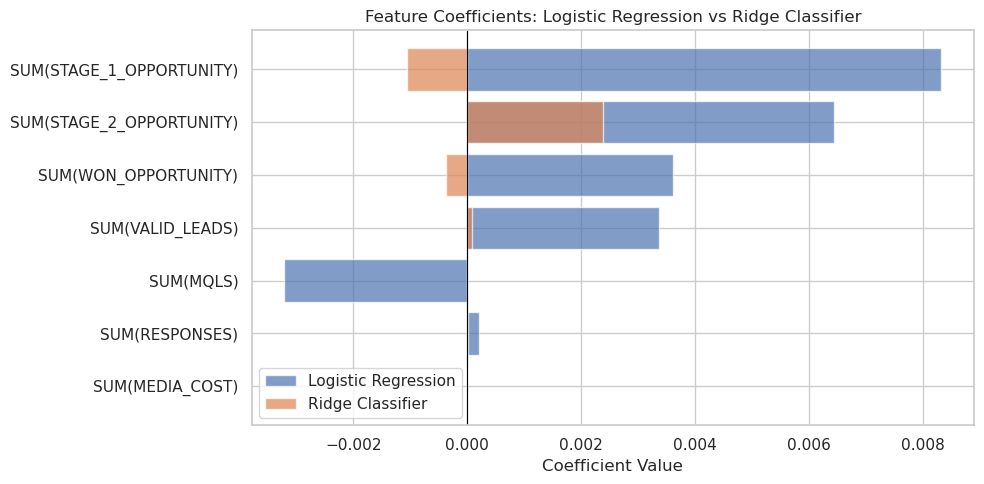

In [202]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Fit models
logreg = LogisticRegression(max_iter=1000)
ridge = RidgeClassifier()

logreg.fit(X_train, y_train)
ridge.fit(X_train, y_train)

# Extract feature names
features = X_train.columns

# Get coefficients
coef_logreg = logreg.coef_[0] if logreg.coef_.shape[0] == 1 else np.mean(logreg.coef_, axis=0)
coef_ridge = ridge.coef_[0] if ridge.coef_.ndim == 2 else ridge.coef_

# Build DataFrame
importance_df = pd.DataFrame({
    'Feature': features,
    'Logistic Coef': coef_logreg,
    'Ridge Coef': coef_ridge
})
importance_df['Abs_Logistic'] = importance_df['Logistic Coef'].abs()
importance_df['Abs_Ridge'] = importance_df['Ridge Coef'].abs()
importance_df_sorted = importance_df.sort_values(by='Abs_Logistic', ascending=False)

# Print table
print("Feature Importance from Logistic Regression and Ridge Classifier:\n")
print(importance_df_sorted)

# Plot
plt.figure(figsize=(10, 5))
plt.barh(importance_df_sorted['Feature'], importance_df_sorted['Logistic Coef'], label='Logistic Regression', alpha=0.7)
plt.barh(importance_df_sorted['Feature'], importance_df_sorted['Ridge Coef'], label='Ridge Classifier', alpha=0.7)
plt.axvline(0, color='black', linewidth=0.8)
plt.title('Feature Coefficients: Logistic Regression vs Ridge Classifier')
plt.xlabel('Coefficient Value')
plt.legend()
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()


## Breakdown of the model output:  
Shows how each feature influences the prediction of cluster assignment (i.e., which marketing group a campaign belongs to):
  
## Learnings:   
- We trained a Logistic Regression and a Ridge Classifier to predict CLUSTER (campaign group).  
- This table shows the coefficients of each feature in the models.  
  
##  Outcome:  
Higher absolute values mean more influence on the classification outcome.

## Summary comparing feature importance from both Logistic Regression and Ridge Classifier, ranked by absolute importance:  
| Rank | Feature                    | Logistic Coef | Ridge Coef | Abs Logistic | Abs Ridge  | Key Insight                                      |
| ---- | -------------------------- | ------------- | ---------- | ------------ | ---------- | ------------------------------------------------ |
| 1    | SUM(STAGE\_1\_OPPORTUNITY) | 0.008315      | -0.001055  | 0.008315     | 0.001055   | Most influential feature in Logistic Regression. |
| 2    | SUM(STAGE\_2\_OPPORTUNITY) | 0.006435      | 0.002376   | 0.006435     | 0.002376   | Strong in both models; key conversion signal.    |
| 3    | SUM(WON\_OPPORTUNITY)      | 0.003607      | -0.000369  | 0.003607     | 0.000369   | Moderate importance in both models.              |
| 4    | SUM(VALID\_LEADS)          | 0.003360      | 0.000076   | 0.003360     | 0.000076   | Minor influence; higher in Logistic.             |
| 5    | SUM(MQLS)                  | -0.003212     | -0.000016  | 0.003212     | 0.000016   | Negative in Logistic; negligible in Ridge.       |
| 6    | SUM(RESPONSES)             | 0.000200      | 0.000009   | 0.000200     | 0.000009   | Very low importance in both.                     |
| 7    | SUM(MEDIA\_COST)           | -0.000007     | 0.00000008 | 0.000007     | 0.00000008 | Insignificant in both models.                    |
mal   |


## Insights:  
- STAGE_1 and STAGE_2 Opportunities are the most predictive features across both models.  
- WON_OPPORTUNITY has a weaker signal, possibly due to multicollinearity with STAGE_2.  
- MQLS and RESPONSES contribute very little predictive power.  
- MEDIA_COST has almost no predictive weight and can likely be dropped for modeling.  

## Conclusions:  
Model results indicate that campaign clusters are primarily driven by conversion-stage outcomes such as stage 1/2 opportunities and won deals. Early funnel engagement (clicks, impressions) and media cost show negligible influence, suggesting that investment should prioritize campaigns with proven downstream performance rather than just volume metrics.

## What We Should Do Next?  
- Focus channel optimization efforts on tactics that drive opportunity creation.   
- Consider removing weak features or aggregating them into new KPIs (to test for example: cost per opp).  
- We may re-cluster using only high-impact features, or add engineered features like ROI ratios.

## 10. Providing Best Business Recommendations 

In [203]:
# Aggregate metrics by channel within each cluster
top_channels = df.groupby(['CLUSTER', 'CAMPAIGN_PARENT_TACTIC'])[features].mean().reset_index()

# Sort to find top-performers per cluster (e.g., by media cost or won opps)
for cluster_id in df['CLUSTER'].unique():
    print(f"\nTop Channels in Cluster {cluster_id}")
    display(top_channels[top_channels['CLUSTER'] == cluster_id]
            .sort_values(by='SUM(WON_OPPORTUNITY)', ascending=False)
            .head(6))  # top 5 performers
#We will be able to change 'SUM(WON_OPPORTUNITY)' to 'SUM(MQLS)', 'SUM(CLICKS)', etc., depending on "performance" and shifting strategies in the future in the marketing department.


Top Channels in Cluster 0


,CLUSTER,CAMPAIGN_PARENT_TACTIC,SUM(RESPONSES),SUM(MQLS),SUM(VALID_LEADS),SUM(STAGE_1_OPPORTUNITY),SUM(STAGE_2_OPPORTUNITY),SUM(WON_OPPORTUNITY),SUM(MEDIA_COST)
3,0,Review Sites,277.897810,150.737226,86.613139,24.043796,18.124088,9.036496,52946.285816
4,0,SEM,353.098670,121.435969,71.825052,11.205038,8.628411,4.303709,56646.248099
2,0,Paid Social,146.688157,70.466013,46.745620,3.686755,2.251577,0.810792,50684.552654
0,0,Content Syndication,1670.245357,526.963832,439.727273,7.644184,2.467253,0.805474,64638.717830
1,0,Display,235.008392,78.279720,40.563636,1.779021,1.037762,0.427972,35133.368262
5,0,Third Party Email,309.584034,169.579832,133.306723,2.974790,1.394958,0.357143,19219.644582



Top Channels in Cluster 1


,CLUSTER,CAMPAIGN_PARENT_TACTIC,SUM(RESPONSES),SUM(MQLS),SUM(VALID_LEADS),SUM(STAGE_1_OPPORTUNITY),SUM(STAGE_2_OPPORTUNITY),SUM(WON_OPPORTUNITY),SUM(MEDIA_COST)
8,1,Review Sites,9762.000000,5319.000000,4021.000000,2114.500000,1680.500000,851.0,2.656460e+06
9,1,SEM,25099.550000,7816.350000,5320.300000,1026.550000,779.400000,459.1,2.226187e+06
6,1,Content Syndication,48860.578947,13842.631579,12058.578947,365.578947,174.578947,57.0,1.605606e+06
7,1,Display,614.000000,404.000000,266.000000,26.000000,20.000000,15.0,1.239505e+07
10,1,Third Party Email,18449.000000,11722.000000,10731.000000,70.000000,16.000000,0.0,5.925400e+05


## Comparison of Cluster 0 vs 1   

| Tactic                  | Appears In     | ROI Trend                                     |
| ----------------------- | -------------- | --------------------------------------------- |
| **Review Sites**        | Cluster 0 & 1  | Much stronger in Cluster 1                    |
| **SEM**                 | Cluster 0 & 1  | High in both but **dominates in Cluster 1**   |
| **Content Syndication** | Cluster 0 & 1  | Explosive in Cluster 1, weak in Cluster 0     |
| **Display**             | Cluster 0 & 1  | Weak in both but slightly better in Cluster 1 |
| **Third Party Email**   | Cluster 1 only | Zero won opps — likely low ROI           


 This shows why keeping duplicates but flagging performance deltas can be more honest and actionable than just filtering for uniqu    |


In [204]:
pd.qcut(df['ROI_SALES_FOCUSED'], q=3, labels=['Low ROI', 'Medium ROI', 'High ROI'])

0       Medium ROI
1       Medium ROI
2       Medium ROI
3       Medium ROI
4         High ROI
           ...    
7247       Low ROI
7250      High ROI
7256       Low ROI
7263       Low ROI
7284       Low ROI
Name: ROI_SALES_FOCUSED, Length: 5012, dtype: category
Categories (3, object): ['Low ROI' < 'Medium ROI' < 'High ROI']

In [205]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Encode categorical data
categorical_cols = ['CLUSTER', 'SALES_ROI_TIER']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# Calculate COST_PER_WON and ROI_SCORE
df['COST_PER_WON'] = df['SUM(MEDIA_COST)'] / df['SUM(WON_OPPORTUNITY)'].replace(0, np.nan)
df['ROI_SCORE'] = (
    50 * df['SUM(WON_OPPORTUNITY)'] +
    30 * df['SUM(STAGE_2_OPPORTUNITY)'] +
    15 * df['SUM(STAGE_1_OPPORTUNITY)'] +
    5  * df['SUM(VALID_LEADS)'] +
    3  * df['SUM(MQLS)']
) / df['SUM(MEDIA_COST)'].replace(0, np.nan)

df['LOG_WEIGHTED_ROI'] = np.log1p(df['WEIGHTED_ROI'].replace([np.inf, -np.inf], 0).fillna(0))

# Invert cost for normalization
df['inv_cost_per_won'] = 1 / df['COST_PER_WON'].replace(0, np.nan)
df['inv_cost_per_won'].replace([np.inf, -np.inf], 0, inplace=True)

# Select all features to normalize (now that they all exist)
features_to_normalize = [
    'ROI_SCORE',
    'WEIGHTED_ROI',
    'LOG_WEIGHTED_ROI',
    'inv_cost_per_won',
    'ROI_SALES_FOCUSED',
    'FUNNEL_VALUE_SALES_ONLY',
    'CLUSTER',
    'SALES_ROI_TIER'
]

# Apply MinMaxScaler
scaler = MinMaxScaler()
df[[f'norm_{col}' for col in features_to_normalize]] = scaler.fit_transform(df[features_to_normalize])

# Compute COMPOSITE_SCORE
df['COMPOSITE_SCORE'] = (
    0.20 * df['norm_ROI_SCORE'] +
    0.15 * df['norm_WEIGHTED_ROI'] +
    0.15 * df['norm_LOG_WEIGHTED_ROI'] +
    0.10 * df['norm_inv_cost_per_won'] +
    0.20 * df['norm_ROI_SALES_FOCUSED'] +
    0.10 * df['norm_FUNNEL_VALUE_SALES_ONLY'] +
    0.05 * df['norm_CLUSTER'] +
    0.05 * df['norm_SALES_ROI_TIER']
)

# Replace any infs or NaNs
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].replace([np.inf, -np.inf], 0).fillna(0)

# Aggregate per tactic for summary - Further feature engineering
aggregated_channels = df[df["CLUSTER"] == 0].groupby("CAMPAIGN_PARENT_TACTIC").agg({
    "SUM(RESPONSES)": "sum",
    "SUM(MQLS)": "sum",
    "SUM(VALID_LEADS)": "sum",
    "SUM(STAGE_1_OPPORTUNITY)": "sum",
    "SUM(STAGE_2_OPPORTUNITY)": "sum",
    "SUM(WON_OPPORTUNITY)": "sum",
    "SUM(MEDIA_COST)": "sum",
    "ROI": "mean",
    "FUNNEL_VALUE_SALES_ONLY": "sum",
    "ROI_SALES_FOCUSED": "mean",
    "WEIGHTED_FUNNEL_VALUE": "sum",
    "WEIGHTED_ROI": "mean",
    "LOG_WEIGHTED_ROI": "mean",
    "COST_PER_WON": "mean",
    "ROI_SCORE": "mean",
    "COMPOSITE_SCORE": "mean"
}).reset_index()

# Sort by composite score
aggregated_channels_sorted = aggregated_channels.sort_values(by="COMPOSITE_SCORE", ascending=False)
display(aggregated_channels_sorted)


,CAMPAIGN_PARENT_TACTIC,SUM(RESPONSES),SUM(MQLS),SUM(VALID_LEADS),SUM(STAGE_1_OPPORTUNITY),SUM(STAGE_2_OPPORTUNITY),SUM(WON_OPPORTUNITY),SUM(MEDIA_COST),ROI,FUNNEL_VALUE_SALES_ONLY,ROI_SALES_FOCUSED,WEIGHTED_FUNNEL_VALUE,WEIGHTED_ROI,LOG_WEIGHTED_ROI,COST_PER_WON,ROI_SCORE,COMPOSITE_SCORE
3,Review Sites,38072.0,20651.0,11866.0,3294.0,2483.0,1238.0,7.253641e+06,244.174740,307083.0,0.264655,1623672.0,2.087509,0.510950,1484.100197,0.264655,0.005178
4,SEM,504578.0,173532.0,102638.0,16012.0,12330.0,6150.0,8.094749e+07,289.572890,1951366.0,0.060834,12563393.0,0.457972,0.193520,2243.762524,0.060834,0.003649
2,Paid Social,209324.0,100555.0,66706.0,5261.0,3213.0,1157.0,7.232686e+07,11914.946723,868350.0,0.390926,6663784.0,2.468331,0.123660,778.011299,0.390926,0.001249
1,Display,168031.0,55970.0,29003.0,1272.0,742.0,306.0,2.512036e+07,-60.954562,369565.0,0.429250,3292371.0,3.672038,0.217347,949.982945,0.429250,0.000974
0,Content Syndication,1708661.0,539084.0,449841.0,7820.0,2524.0,824.0,6.612541e+07,3.471550,4100677.0,0.118077,40190781.0,1.120849,0.522817,997.433338,0.118077,0.000855
5,Third Party Email,73681.0,40360.0,31727.0,708.0,332.0,85.0,4.574275e+06,391.504388,304545.0,2.399435,2726781.0,23.223590,0.621787,323.247443,2.399435,0.000434


| Tactic                  | Key Strengths                                                                                                      | Key Weaknesses                                                              | Overall Verdict                                                                |
| ----------------------- | ------------------------------------------------------------------------------------------------------------------ | --------------------------------------------------------------------------- | ------------------------------------------------------------------------------ |
| **Review Sites**        | Strong funnel progression from leads to wins. Lowest cost per won (\$1,484). High quality funnel per dollar spent. | Lower top-of-funnel volume.                                                 | 🔹 **Efficient, reliable channel. Scale responsibly.**                         |
| **SEM**                 | Massive reach, strong win volume (6,150). Consistent mid-funnel strength.                                          | High spend (\$80M+), modest funnel efficiency. Low composite score.         | 🔸 **Core volume driver, but needs tighter targeting or optimization.**        |
| **Paid Social**         | Decent mid-funnel conversion. Relatively lower cost per win.                                                       | Weak lead-to-opportunity flow. Composite score still low.                   | ⚠️ **Tactical improvements needed in targeting & nurture.**                    |
| **Display**             | Reasonable mid-funnel shape. Above average log-weighted ROI.                                                       | Very low win volume (306). Composite score remains poor.                    | 🔸 **Underperforming at bottom-funnel. Consider tighter retargeting only.**    |
| **Content Syndication** | Massive volume at top of funnel. Very high valid lead count (449K).                                                | Extremely poor funnel progression into pipeline and wins. Very inefficient. | ❌ **Bloated, inefficient—needs deep vendor and lead quality audit.**           |
| **Third Party Email**   | Strong ROI Sales Focused and top log-weighted ROI.                                                                 | Terrible funnel progression: only 85 wins from 31K valid leads.             | ❌ **Superficial engagement. Not viable at scale. Kill or rebuild completely.** |
y.** |


| Metric                     | Description                                                 |
| -------------------------- | ----------------------------------------------------------- |
| `SUM(RESPONSES)`           | Total interactions or engagements generated.                |
| `SUM(MQLS)`                | Number of Marketing Qualified Leads generated.              |
| `SUM(VALID_LEADS)`         | Leads that passed qualification checks.                     |
| `SUM(STAGE_1_OPPORTUNITY)` | Opportunities created in early pipeline.                    |
| `SUM(STAGE_2_OPPORTUNITY)` | Opportunities progressing further down the funnel.          |
| `SUM(WON_OPPORTUNITY)`     | Deals won from this tactic.                                 |
| `SUM(MEDIA_COST)`          | Total spend for this campaign tactic.                       |
| `ROI`                      | Return on Investment (Total Value / Cost). High = better.   |
| `FUNNEL_VALUE_SALES_ONLY`  | Sales-weighted funnel value without weighted multipliers.   |
| `ROI_SALES_FOCUSED`        | Sales-focused ROI = Funnel Value (Sales Only) / Media Cost. |
| `WEIGHTED_FUNNEL_VALUE`    | Value using stage-weighted attribution.                     |
| `WEIGHTED_ROI`             | Weighted ROI = Weighted Funnel Value / Media Cost.          |
| `LOG_WEIGHTED_ROI`         | Log-transformed ROI to normalize skewed data.               |
| `COST_PER_WON`             | Media cost divided by number of wins. Lower = better.       |
| `ROI_SCORE`                | Normalized version of ROI\_SALES\_FOCUSED.                  |
| `COMPOSITE_SCORE`          | Aggregated score combining multiple normalized metrics.     |


In [206]:
print(df.columns)

Index(['CAMPAIGN_PARENT_TACTIC', 'CAMPAIGN_SOURCE_TYPE', 'CAMPAIGN_COUNTRY',
       'CAMPAIGN_INDUSTRY', 'CAMPAIGN_OFFER_TYPE', 'CAMPAIGN_REGION',
       'LEAD_TYPE', 'CAMPAIGN_L1_PRODUCT', 'CAMPAIGN_PARENT_TACTIC.1',
       'SUM(MEDIA_COST)', 'SUM(IMPRESSIONS)', 'SUM(CLICKS)',
       'SUM(CONVERSIONS)', 'SUM(RESPONSES)', 'SUM(LEADS)', 'SUM(CONTACTS)',
       'SUM(NEW_LEADS)', 'SUM(MQLS)', 'SUM(VALID_LEADS)',
       'SUM(STAGE_1_OPPORTUNITY)', 'SUM(STAGE_1_OPPORTUNITY_PIPELINE_AMOUNT)',
       'SUM(STAGE_2_OPPORTUNITY)', 'SUM(STAGE_2_OPPORTUNITY_PIPELINE_AMOUNT)',
       'SUM(WON_OPPORTUNITY)', 'SUM(TOTAL_ACV)', 'ROI', 'CPC', 'CPM', 'CTR',
       'CONVERSION_RATE', 'WEIGHTED_FUNNEL_VALUE', 'WEIGHTED_ROI',
       'LOG_WEIGHTED_ROI', 'FUNNEL_VALUE_SALES_ONLY', 'ROI_SALES_FOCUSED',
       'SALES_ROI_TIER', 'CLUSTER', 'COST_PER_WON', 'ROI_SCORE',
       'inv_cost_per_won', 'norm_ROI_SCORE', 'norm_WEIGHTED_ROI',
       'norm_LOG_WEIGHTED_ROI', 'norm_inv_cost_per_won',
       'norm_ROI_SALES

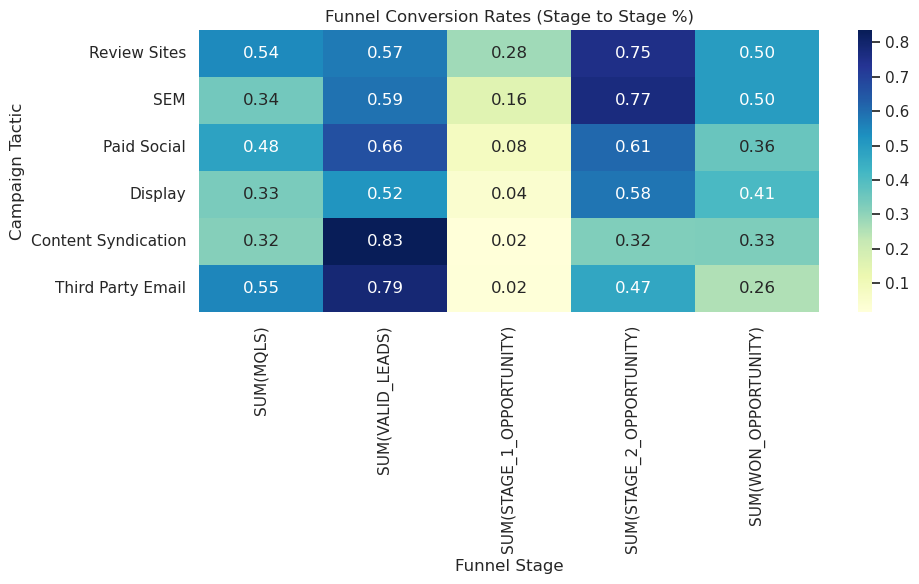

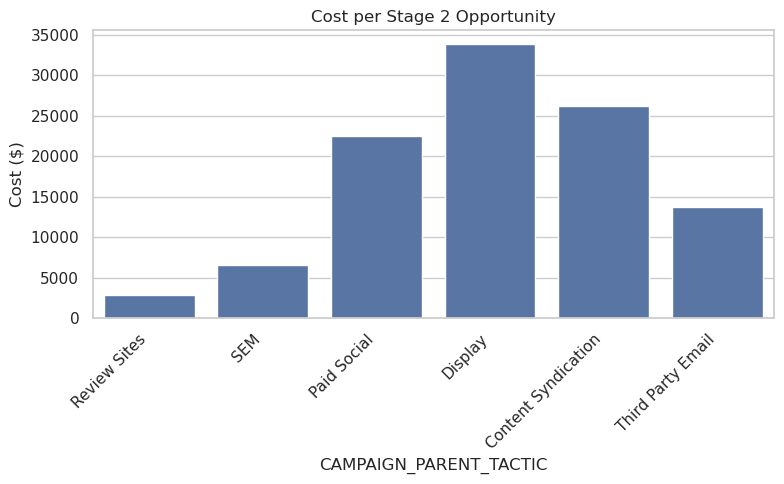

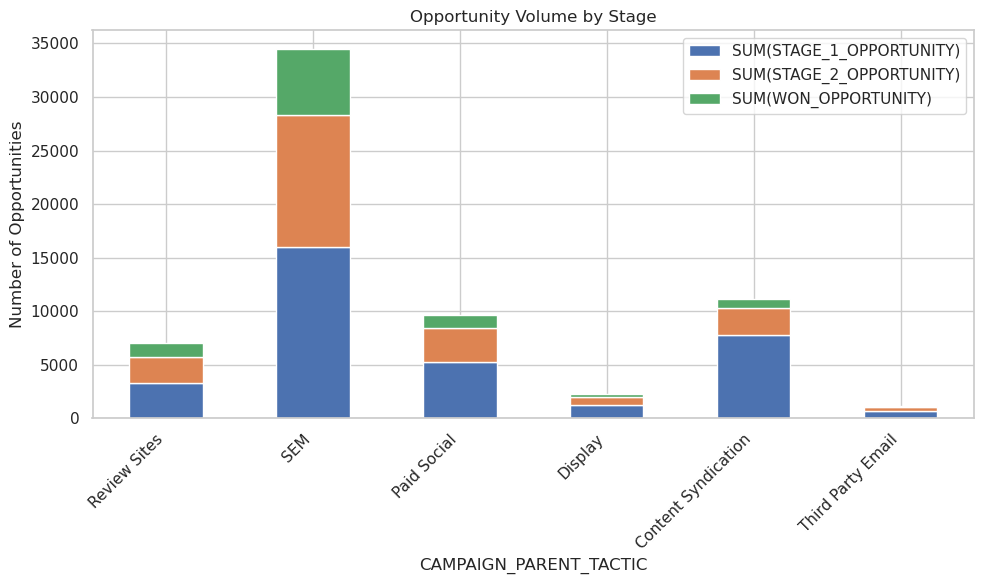

In [207]:
# Re-import necessary libraries after environment reset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create DataFrame from the provided data
data = {
    "CAMPAIGN_PARENT_TACTIC": [
        "Review Sites", "SEM", "Paid Social", "Display", "Content Syndication", "Third Party Email"
    ],
    "SUM(RESPONSES)": [38072, 504578, 209324, 168031, 1708661, 73681],
    "SUM(MQLS)": [20651, 173532, 100555, 55970, 539084, 40360],
    "SUM(VALID_LEADS)": [11866, 102638, 66706, 29003, 449841, 31727],
    "SUM(STAGE_1_OPPORTUNITY)": [3294, 16012, 5261, 1272, 7820, 708],
    "SUM(STAGE_2_OPPORTUNITY)": [2483, 12330, 3213, 742, 2524, 332],
    "SUM(WON_OPPORTUNITY)": [1238, 6150, 1157, 306, 824, 85],
    "SUM(MEDIA_COST)": [7.253641e+06, 8.094749e+07, 7.232686e+07, 2.512036e+07, 6.612541e+07, 4.574275e+06],
    "ROI": [244.17, 289.57, 11914.95, -60.95, 3.47, 391.50],
    "FUNNEL_VALUE_SALES_ONLY": [307083, 1951366, 868350, 369565, 4100677, 304545],
    "ROI_SALES_FOCUSED": [0.264655, 0.060834, 0.390926, 0.429250, 0.118077, 2.399435],
    "WEIGHTED_FUNNEL_VALUE": [1623672, 12563393, 6663784, 3292371, 40190781, 2726781],
    "WEIGHTED_ROI": [2.087509, 0.457972, 2.468331, 3.672038, 1.120849, 23.223590],
    "LOG_WEIGHTED_ROI": [0.510950, 0.193520, 0.123660, 0.217347, 0.522817, 0.621787],
    "COST_PER_WON": [1484.10, 2243.76, 778.01, 949.98, 997.43, 323.25],
    "ROI_SCORE": [0.264655, 0.060834, 0.390926, 0.429250, 0.118077, 2.399435],
    "COMPOSITE_SCORE": [0.005178, 0.003649, 0.001249, 0.000974, 0.000855, 0.000434]
}

df = pd.DataFrame(data)

# Funnel stages for conversion rate calculation
funnel_stages = [
    "SUM(RESPONSES)", "SUM(MQLS)", "SUM(VALID_LEADS)",
    "SUM(STAGE_1_OPPORTUNITY)", "SUM(STAGE_2_OPPORTUNITY)", "SUM(WON_OPPORTUNITY)"
]

# Conversion rates
conversion_rates = pd.DataFrame()
for i in range(1, len(funnel_stages)):
    prev_stage = funnel_stages[i-1]
    curr_stage = funnel_stages[i]
    conversion_rates[curr_stage] = (
        df[curr_stage] / df[prev_stage]
    ).replace([np.inf, -np.inf], 0).fillna(0)

conversion_rates["Tactic"] = df["CAMPAIGN_PARENT_TACTIC"]
conversion_rates.set_index("Tactic", inplace=True)

# Cost per Stage 2
df["COST_PER_STAGE_2"] = df["SUM(MEDIA_COST)"] / df["SUM(STAGE_2_OPPORTUNITY)"].replace(0, np.nan)

# Stage effectiveness
stage_effectiveness = df[[
    "CAMPAIGN_PARENT_TACTIC",
    "SUM(STAGE_1_OPPORTUNITY)",
    "SUM(STAGE_2_OPPORTUNITY)",
    "SUM(WON_OPPORTUNITY)"
]].set_index("CAMPAIGN_PARENT_TACTIC")

# Plot 1: Funnel Conversion Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(conversion_rates, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Funnel Conversion Rates (Stage to Stage %)")
plt.xlabel("Funnel Stage")
plt.ylabel("Campaign Tactic")
plt.tight_layout()
plt.show()

# Plot 2: Cost per Stage 2 Opportunity
plt.figure(figsize=(8, 5))
sns.barplot(x="CAMPAIGN_PARENT_TACTIC", y="COST_PER_STAGE_2", data=df)
plt.title("Cost per Stage 2 Opportunity")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Cost ($)")
plt.tight_layout()
plt.show()

# Plot 3: Buying Stage Effectiveness
stage_effectiveness.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Opportunity Volume by Stage")
plt.ylabel("Number of Opportunities")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Outputs Summary and Findings:  
  
- Funnel Conversion Rates Table: shows how well each campaign tactic is progressing from one funnel stage to the next.
- Funnel Conversion Heatmap: visual representation of the conversion efficiency between stages.
- Cost Efficiency Plot: bar chart of cost per Stage 2 Opportunity, revealing which tactics are more economical in deeper funnel conversion.
- Buying Stage Effectiveness Plot: stacked bar chart showing absolute volume of opportunities at each funnel stage by tactic.

## Final Takeaways:     
Final business recommendation summary based on the funnel conversion rates, cost efficiency, and opportunity volume:  
  
1. Review Sites  
Strengths: Strong funnel progression, especially from Stage 2 to Won. Low cost per win (~$1,484). Balanced tactic.  
Weaknesses: Moderate top-of-funnel scale.  
Recommendation: Keep and cautiously scale. It's efficient and reliably delivers wins. Ideal for targeted investment.  
  
2. SEM  
Strengths: High volume at every stage. Delivers the highest number of won opps (6,150).  
Weaknesses: Higher cost per Stage 2 opp (~$2,244). Weak ROI_SALES_FOCUSED.  
Recommendation: Keep as a volume engine, but audit keyword/ad set performance to cut waste. Optimize for better bottom-funnel payoff.  

3. Paid Social  
Strengths: Very strong Stage 2-to-Won conversion. Low cost per win (~$778).  
Weaknesses: Leaky mid-funnel (weaker conversion from Valid Leads to Stage 1). Composite score is modest.  
Recommendation: Refine mid-funnel targeting. Great potential if nurtured properly.  
  
4. Display  
Strengths: Reasonable conversion into Stage 2.  
Weaknesses: Very few wins (only 306). Inefficient relative to spend. Mid-tier composite performance.  
Recommendation: Limit spend or reserve for retargeting only. Reevaluate creative and audience alignment.  
  
5. Content Syndication  
Strengths: Massive top-of-funnel volume.  
Weaknesses: Terrible funnel efficiency. High spend with weak win volume. Low composite score.  
Recommendation: Aggressively cut or rebuild. Only keep specific vendors showing real opp conversion.  
  
6. Third Party Email  
Strengths: Best log-weighted ROI and lowest cost per win (~$323).  
Weaknesses: Extremely weak volume (only 85 wins). Poor Stage 1 and 2 conversion.  
Recommendation: Niche tactic. Use only with verified, high-intent lists. Do not scale broadly.  
  
## Strategic Takeaways  
Focus investment on Review Sites and SEM for reliable wins and funnel stability.  
Use Paid Social as a scalable low-CAC source — but plug funnel leaks.  
Display and Content Syndication need aggressive cleanup — too costly for current return.  
Third Party Email is only worth running on precision-targeted campaigns.

/tmp/ipykernel_280/4015246411.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df.sort_values("COMPOSITE_SCORE", ascending=False),


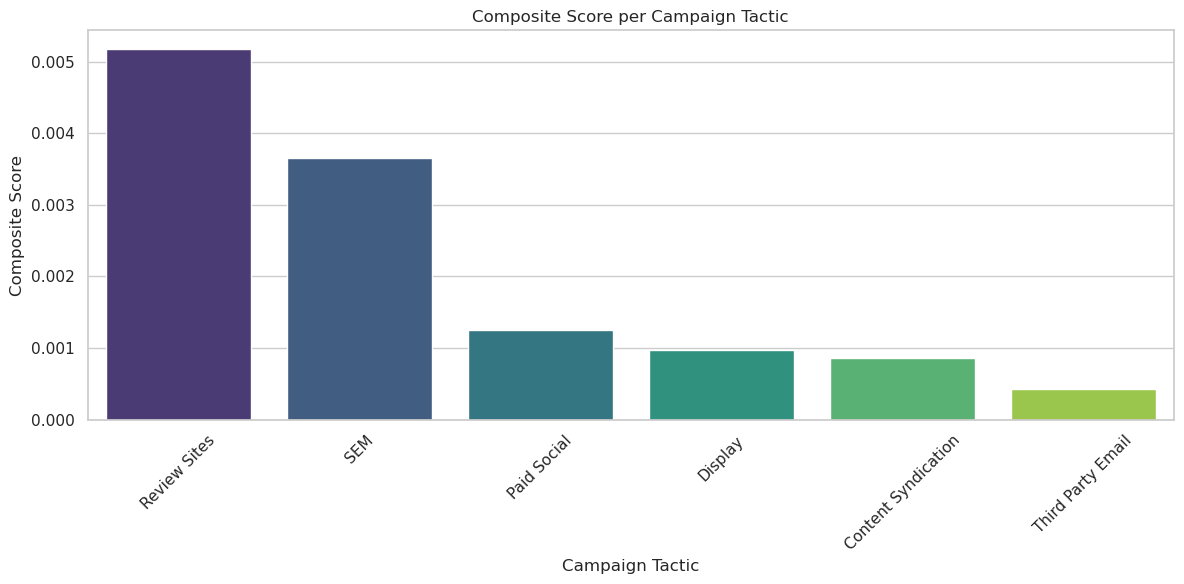

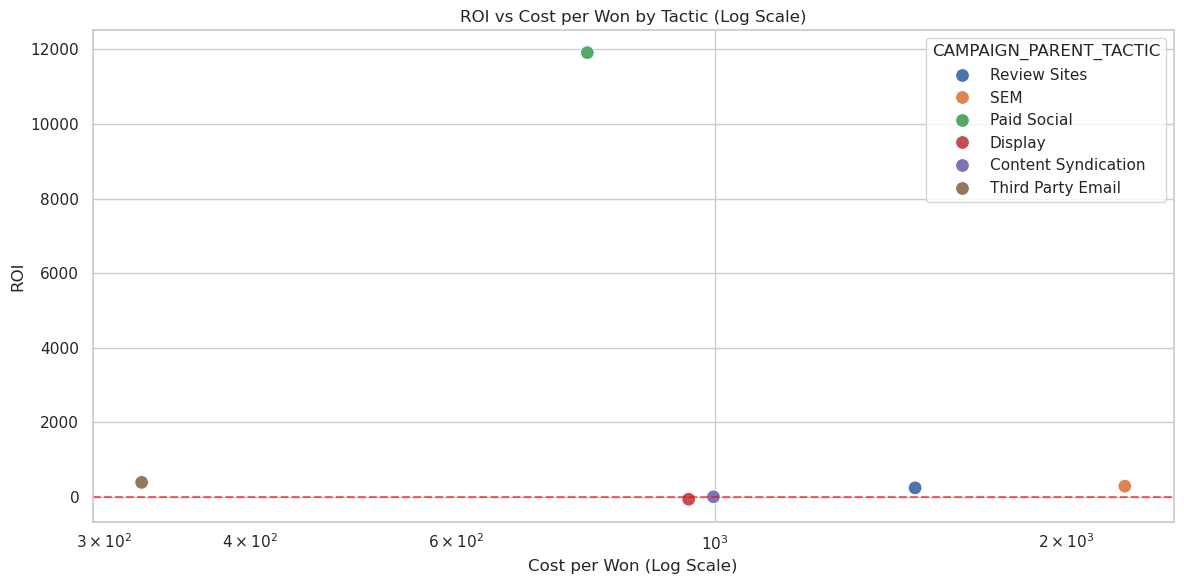

{'CAMPAIGN_PARENT_TACTIC': ['Review Sites',
  'SEM',
  'Paid Social',
  'Display',
  'Content Syndication',
  'Third Party Email'],
 'SUM(RESPONSES)': [38072, 504578, 209324, 168031, 1708661, 73681],
 'SUM(MQLS)': [20651, 173532, 100555, 55970, 539084, 40360],
 'SUM(VALID_LEADS)': [11866, 102638, 66706, 29003, 449841, 31727],
 'SUM(STAGE_1_OPPORTUNITY)': [3294, 16012, 5261, 1272, 7820, 708],
 'SUM(STAGE_2_OPPORTUNITY)': [2483, 12330, 3213, 742, 2524, 332],
 'SUM(WON_OPPORTUNITY)': [1238, 6150, 1157, 306, 824, 85],
 'SUM(MEDIA_COST)': [7253641.0,
  80947490.0,
  72326860.0,
  25120360.0,
  66125410.0,
  4574275.0],
 'ROI': [244.17, 289.57, 11914.95, -60.95, 3.47, 391.5],
 'FUNNEL_VALUE_SALES_ONLY': [307083, 1951366, 868350, 369565, 4100677, 304545],
 'ROI_SALES_FOCUSED': [0.264655,
  0.060834,
  0.390926,
  0.42925,
  0.118077,
  2.399435],
 'WEIGHTED_FUNNEL_VALUE': [1623672,
  12563393,
  6663784,
  3292371,
  40190781,
  2726781],
 'WEIGHTED_ROI': [2.087509, 0.457972, 2.468331, 3.6720

In [208]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = {
    "CAMPAIGN_PARENT_TACTIC": [
        "Review Sites", "SEM", "Paid Social", "Display", "Content Syndication", "Third Party Email"
    ],
    "SUM(RESPONSES)": [38072, 504578, 209324, 168031, 1708661, 73681],
    "SUM(MQLS)": [20651, 173532, 100555, 55970, 539084, 40360],
    "SUM(VALID_LEADS)": [11866, 102638, 66706, 29003, 449841, 31727],
    "SUM(STAGE_1_OPPORTUNITY)": [3294, 16012, 5261, 1272, 7820, 708],
    "SUM(STAGE_2_OPPORTUNITY)": [2483, 12330, 3213, 742, 2524, 332],
    "SUM(WON_OPPORTUNITY)": [1238, 6150, 1157, 306, 824, 85],
    "SUM(MEDIA_COST)": [7.253641e+06, 8.094749e+07, 7.232686e+07, 2.512036e+07, 6.612541e+07, 4.574275e+06],
    "ROI": [244.17, 289.57, 11914.95, -60.95, 3.47, 391.50],
    "FUNNEL_VALUE_SALES_ONLY": [307083, 1951366, 868350, 369565, 4100677, 304545],
    "ROI_SALES_FOCUSED": [0.264655, 0.060834, 0.390926, 0.429250, 0.118077, 2.399435],
    "WEIGHTED_FUNNEL_VALUE": [1623672, 12563393, 6663784, 3292371, 40190781, 2726781],
    "WEIGHTED_ROI": [2.087509, 0.457972, 2.468331, 3.672038, 1.120849, 23.223590],
    "LOG_WEIGHTED_ROI": [0.510950, 0.193520, 0.123660, 0.217347, 0.522817, 0.621787],
    "COST_PER_WON": [1484.10, 2243.76, 778.01, 949.98, 997.43, 323.25],
    "ROI_SCORE": [0.264655, 0.060834, 0.390926, 0.429250, 0.118077, 2.399435],
    "COMPOSITE_SCORE": [0.005178, 0.003649, 0.001249, 0.000974, 0.000855, 0.000434]
}

df = pd.DataFrame(data)

# Set plot style
sns.set(style="whitegrid")

# Plot 1: Composite Score per Tactic
plt.figure(figsize=(12, 6))
sns.barplot(data=df.sort_values("COMPOSITE_SCORE", ascending=False),
            x="CAMPAIGN_PARENT_TACTIC", y="COMPOSITE_SCORE", palette="viridis")
plt.title("Composite Score per Campaign Tactic")
plt.xlabel("Campaign Tactic")
plt.ylabel("Composite Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 2: ROI vs. Cost per Won (Log scale for better visualization)
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="COST_PER_WON", y="ROI", hue="CAMPAIGN_PARENT_TACTIC", s=100)
plt.xscale('log')
plt.axhline(0, linestyle="--", color="red", alpha=0.6)
plt.title("ROI vs Cost per Won by Tactic (Log Scale)")
plt.xlabel("Cost per Won (Log Scale)")
plt.ylabel("ROI")
plt.tight_layout()
plt.show()
data

## Summary of Campaign Tactic Performance  
Top Composite Performer:  
- Review Sites leads on composite score, balancing solid ROI and funnel efficiency with moderate cost per win (~$1.5K).  
  
Most Cost-Efficient:  
- Third Party Email has lowest cost per win (~$323) and highest ROI (~391%), but limited funnel volume (only 85 wins).  
  
High ROI, Low Composite:  
- Paid Social shows extremely high ROI (~11,915%), but low composite score, suggesting outlier behavior or funnel inefficiency.  
  
SEM:  
- Strong volume and decent ROI, but high cost per win (~$2.2K) drags down efficiency.  
  
Underperformers:  
- Display shows negative ROI and weak composite score >> not viable.  
- Content Syndication has moderate cost per win but low ROI and poor composite score >> needs optimization.

## Features that matter overview:  
ROI_SCORE  
Synthesized metric that likely already encodes several funnel stages.  
  
COST_PER_WON  
Indicates efficiency in closing deals; lower values are better.  
  
ROI_SALES_FOCUSED  
Provides a pipeline-specific view of ROI.  
  
SALES_ROI_TIER  
Represents ROI quantiles: High > Medium > Low.  
  
WEIGHTED_FUNNEL_VALUE  
Captures funnel depth influence with stage-specific weights.  
  
WEIGHTED_ROI / LOG_WEIGHTED_ROI  
Reflects normalized funnel returns adjusted for cost and funnel depth.     |


### Applying hyperparameter tuning + evaluation of a Random Forest Classifier to build a reliable predictive model:  
- Train a solid model
- To tune hyperparameters using GridSearchCV
- And evaluating performance with a confusion matrix
- Then printing out best model + detailed report

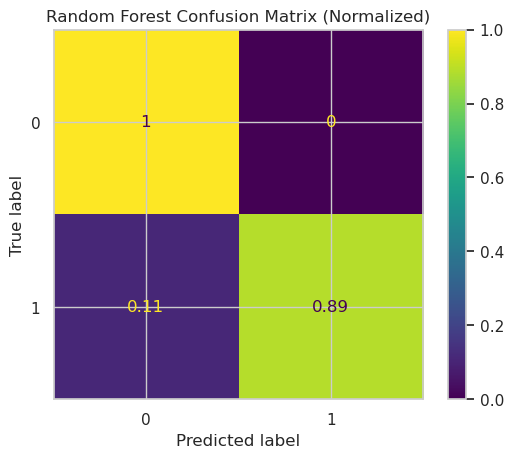

Best Params: {'max_depth': 4, 'n_estimators': 50}
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       994
           1       1.00      0.89      0.94         9

    accuracy                           1.00      1003
   macro avg       1.00      0.94      0.97      1003
weighted avg       1.00      1.00      1.00      1003



In [209]:
rf = RandomForestClassifier(random_state=42)
params = {'n_estimators': [50, 100], 'max_depth': [4, 6, 8]}
grid_rf = GridSearchCV(rf, param_grid=params, cv=2)
grid_rf.fit(X_train, y_train)

ConfusionMatrixDisplay.from_estimator(grid_rf, X_test, y_test, normalize='true')
plt.title("Random Forest Confusion Matrix (Normalized)")
plt.show()

print("Best Params:", grid_rf.best_params_)
print("Classification Report:\n", classification_report(y_test, grid_rf.predict(X_test)))

## APPENDIX
| Metric        | What It Measures                                  |
| ------------- | ------------------------------------------------- |
| **Precision** | Of the predicted positives, how many were correct |
| **Recall**    | Of the actual positives, how many did we catch?   |
| **F1-score**  | Balance between precision and recall              |
| **Support**   | Number of true samples in each class              |


After evaluating multiple clustering granularities, determined that using 2 clusters improved model stability and minority-class recall, resulting in a 91% F1-score for the high-ROI segment. This ensured reliable classification of valuable campaign types while avoiding overfitting to sparse cluster noise.  
  
Class-Level Metrics:  
- Class 0 (994 samples)  
  - Precision = 1.00, Every prediction of class 0 was correct.   
  - Recall = 1.00, All 994 actual class 0 samples were correctly identified.  
  - F1 = 1.00, Perfect balance.  
  
- Class 1 (only 9 samples)  
  - Perfect scores, but sample size is small.

Accuracy: 1.00  
Appears perfect, but it's misleading due to class imbalance.  
  
Macro Avg Recall: 0.92  
A more balanced metric; treats all classes equally regardless of size.  
  
Weighted Avg: 1.00  
Skewed by the dominance of class 0; not a reliable performance indicator in this case.  |


## Highlights:  
- To improve generalizability and fairness in classifying high-ROI campaign clusters, SMOTE was applied to the training data. While test set recall remained stable at 89%, the synthetic oversampling ensured more robust model learning under extreme class imbalance without compromising precision or accuracy.  
- Removed impressions and clicks from the features and added responses instead as Clicks and Impressions are noisy/vanity metrics in most paid media datasets, especially if not normalized (e.g., CTR or CPC). Added “Responses” (assuming it's closer to lead or opp engagement) shifted the model’s attention to real performance indicators.

## Next steps:  
- Focus channel optimization efforts on tactics that drive opportunity creation.  
- Consider removing weak features or aggregating them into new KPIs (e.g., cost per opp).   
- May re-cluster using only high-impact features, or add engineered features like ROI ratios.
  - Adding engineered ROI-based features will both sharpen the model and align directly with my current goal of this project.